### Evaluation Project - 9

## Customer Churn Analysis


### Problem Statement:
    Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

    Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

    Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

    You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 




### DATA PREPARATION:
     - loading Data
     - analyze the data and its dtypes
     - check for missing values.
     - check for realistic irregularities.
     - Feature engineering if required

In [1938]:
#IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score


In [1939]:
train= pd.read_csv('churn.csv')

In [1940]:
train

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [1941]:
train.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

####  Tenure , monthly charges have high std , high spread of data.

In [1942]:
for i in train.columns:
    print(train[i].value_counts())

8441-SHIPE    1
6942-LBFDP    1
5181-OABFK    1
8399-YNDCH    1
8155-IBNHG    1
             ..
0289-IVARM    1
8241-JUIQO    1
1136-XGEQU    1
0365-TRTPY    1
3707-LRWZD    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

#### OBSERVATIONS:
    - Customer ID  can be dropped. as it is unqiue ID for each row and doesnot influence the Target Variable.
    - Tenure,Monthly charges, Total charges are the only Continous Features.
    - Total Charges have Null values with ''

In [1943]:
train['TotalCharges'] = train['TotalCharges'].apply(lambda x: np.NaN if x==' ' else x).astype('float')

In [1944]:
(train.isnull()).sum(axis=0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### NULL Values in total Charges which can be found with help of other features or Mean/ MEdian methods.

#### FEATURE ENGINEERING

In [1945]:
train['total_charge_calculated'] = train['tenure']* train['MonthlyCharges']

In [1946]:
train[['total_charge_calculated','TotalCharges']]

total_charge_calculated  TotalCharges
0                       29.85         29.85
1                     1936.30       1889.50
2                      107.70        108.15
3                     1903.50       1840.75
4                      141.40        151.65
...                       ...           ...
7038                  2035.20       1990.50
7039                  7430.40       7362.90
7040                   325.60        346.45
7041                   297.60        306.60
7042                  6972.90       6844.50

[7043 rows x 2 columns]

#### OBSERVATION:
    - Total Charges in the Data is nothing but total Tenure * monthly Charges, and actual calculated Tenure* monthly Charges are aproximately equal to Total Charges with very minimal error (difference between total charge manually calculated and total Charges.
    - We can replace the total Charges with totach Charges_calculated or we can use tenure* monthly charges to fill the Null values of Total Charges.

In [1947]:
train['TotalCharges'] = train['TotalCharges'].fillna(train['tenure']* train['MonthlyCharges'])

### EDA: 

 
   
 ##### VIZUALIZING TARGET VARIABLE

<AxesSubplot:xlabel='Churn', ylabel='count'>

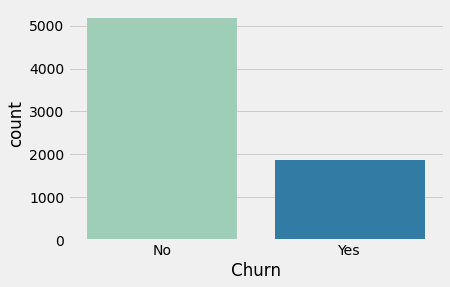

In [1948]:
sb.countplot(train['Churn'],palette='YlGnBu')

#### OBSERVATIONS:
    ---> IMbalaced classes notice in Target label.
    ---> Using OVerSample to have Balanced Class Data for better visualization.

##### LABEL ENCODING NEEDED FOR OVER_SAMPLING FOR EDA

In [1949]:
from sklearn.preprocessing import LabelEncoder

In [1950]:
#female = 0 , male = 1
train['gender'] = train['gender'].apply(lambda x:0 if x=='Female' else 1 )
# No = 0, Yes = 1
train['Partner'] = train['Partner'].apply(lambda x:0 if x=='No' else 1 )
# No = 0, Yes = 1
train['Dependents'] = train['Dependents'].apply(lambda x:0 if x=='No' else 1 )
# No = 0, Yes = 1
train['PhoneService'] = train['PhoneService'].apply(lambda x:0 if x=='No' else 1 )
# No = 0, Yes = 1
train['PaperlessBilling'] = train['PaperlessBilling'].apply(lambda x:0 if x=='No' else 1 )
# No = 0, Yes = 1
train['Churn'] = train['Churn'].apply(lambda x:0 if x=='No' else 1 )

In [1951]:
# N0 =0, No phnoe service = 1, Yes =2 021
train['MultipleLines'] = LabelEncoder().fit_transform(train['MultipleLines'])
# DSL =0,  fiber optic = 1,No = 2
train['InternetService'] = LabelEncoder().fit_transform(train['InternetService'])
# N0 =0, No internet service = 1, Yes =2 021
train['OnlineSecurity'] = LabelEncoder().fit_transform(train['OnlineSecurity'])
# N0 =0, No internet service = 1, Yes =2 021
train['OnlineBackup'] = LabelEncoder().fit_transform(train['OnlineBackup'])
# N0 =0, No internet service = 1, Yes =2 021
train['DeviceProtection'] = LabelEncoder().fit_transform(train['DeviceProtection'])
# N0 =0, No internet service = 1, Yes =2 021
train['TechSupport'] = LabelEncoder().fit_transform(train['TechSupport'])
# N0 =0, No internet service = 1, Yes =2 021
train['StreamingTV'] = LabelEncoder().fit_transform(train['StreamingTV'])
# N0 =0, No internet service = 1, Yes =2 021
train['StreamingMovies'] = LabelEncoder().fit_transform(train['StreamingMovies'])
# month-to-month =0 , two year=2 , one year = 1 021
train['Contract'] = LabelEncoder().fit_transform(train['Contract'])
#el check =2 , mailed check=3 , bank transfer= 0, credit card =1,  2301
train['PaymentMethod'] = LabelEncoder().fit_transform(train['PaymentMethod'])

#### NEED FOR OVERSAMPLING:
    OVERSAMPLING NEEDED FOR EDA  TO GET MORE INSIGHTS ON MINORITY CLASS, As Imblanced classes mighht favor only majority class and give biased insights or favour results only for majority target class.

In [1952]:
from imblearn.over_sampling import SMOTE

In [1953]:
train.drop('customerID',axis=1,inplace=True)

In [1954]:
x_over ,y_over= SMOTE().fit_resample(train.drop(['Churn'],axis=1),train['Churn']) 

([<matplotlib.axis.XTick at 0x15ab1ea6e80>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

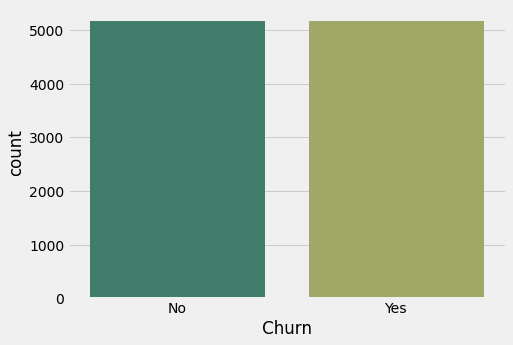

In [1955]:
plt.figure(figsize=(7,5))
sb.countplot(y_over,palette='gist_earth')
plt.xticks([0,1],['No','Yes'])

#### BALANCED CLASSES AFTER OVER SAMPLING

In [1956]:
x_over['Churn'] = y_over

#### Visualizing categorical features:
    - Univariante and Bivariante to understand each feature influence on the Target Variable

#### GENDER

In [1957]:
##### VIsualizing Gender Feature , gender and Churn Relationship

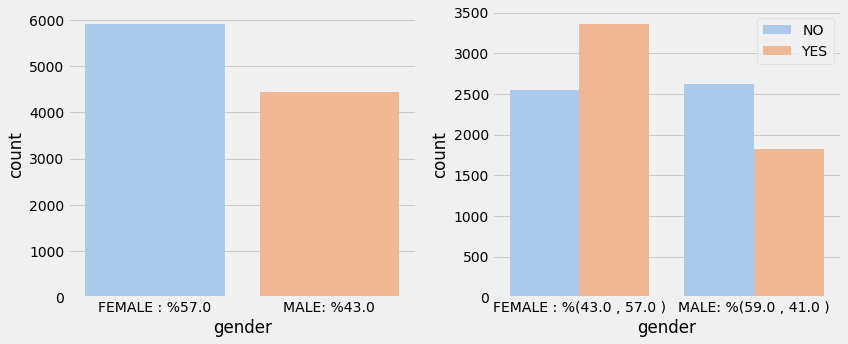

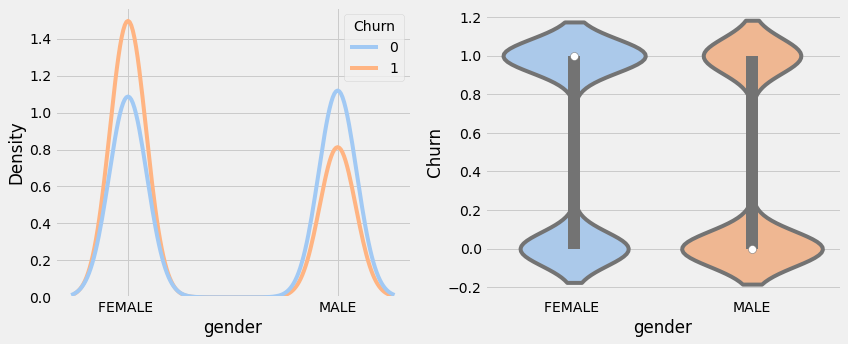

In [1958]:
plt.figure(figsize=(12,5))

probility_ = round(x_over['gender'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['gender'],palette='pastel')
plt.xticks([0,1],['FEMALE : %'+str(probility_[0]),'MALE: %'+str(probility_[1])])



gender_F= round((x_over[x_over['gender']==0]['Churn'].value_counts()/x_over['gender'].value_counts()[0])*100)
gender_M =round( (x_over[x_over['gender']==1]['Churn'].value_counts()/ x_over['gender'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['gender'],hue=y_over,palette='pastel')
plt.xticks([0,1],['FEMALE : %(' + str(gender_F[0]) + ' , '+ str(gender_F[1])+' )',
                  'MALE: %(' + str(gender_M[0]) + ' , '+ str(gender_M[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['gender'],hue=y_over,palette='pastel')
plt.xticks([0,1],['FEMALE ','MALE'])
plt.subplot(1,2,2)
sb.violinplot(x_over['gender'],y_over,palette='pastel')
plt.xticks([0,1],['FEMALE ','MALE'])

plt.tight_layout()




#### OBSERVATIONS:
    - Gender shows correlation with Churn as Female show more probability to belong in Churn Yes(57%), and Male shows more probability to belong in No Churn 59%
    - Count of Female is higher than male in the Company.
    - As seen in kde and violin plt, female density is high for Churn  and for male  churn No.
    
    
##### SENIOR CITIZEN

In [1959]:
##### VIsualizing senior citizen Feature , seniorcitizen and Churn Relationship

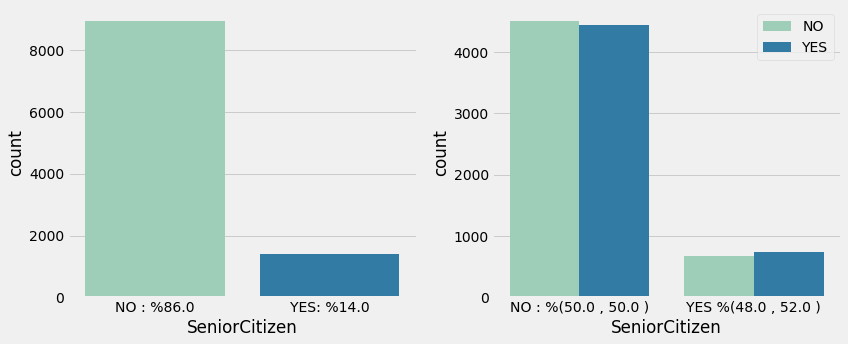

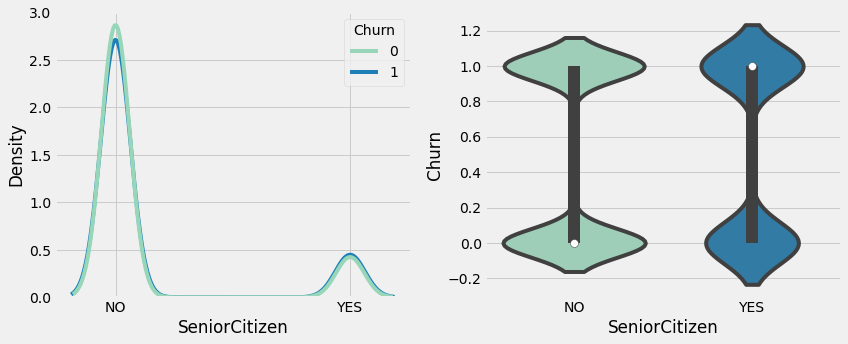

In [1960]:

plt.figure(figsize=(12,5))

probility_ = round(x_over['SeniorCitizen'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['SeniorCitizen'],palette='YlGnBu')
plt.xticks([0,1],['NO : %'+str(probility_[0]),'YES: %'+str(probility_[1])])



seniorCitizen_N= round((x_over[x_over['SeniorCitizen']==0]['Churn'].value_counts()/x_over['SeniorCitizen'].value_counts()[0])*100)
seniorCitizen_Y =round( (x_over[x_over['SeniorCitizen']==1]['Churn'].value_counts()/ x_over['SeniorCitizen'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['SeniorCitizen'],hue=y_over,palette='YlGnBu')
plt.xticks([0,1],['NO : %(' + str(seniorCitizen_N[0]) + ' , '+ str(seniorCitizen_N[1])+' )',
                  'YES %(' + str(seniorCitizen_Y[0]) + ' , '+ str(seniorCitizen_Y[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['SeniorCitizen'],hue=y_over,palette='YlGnBu')
plt.xticks([0,1],['NO','YES'])
plt.subplot(1,2,2)
sb.violinplot(x_over['SeniorCitizen'],y_over,palette='YlGnBu')
plt.xticks([0,1],['NO','YES'])

plt.tight_layout()


#### OBSERVATIONS:
    - Probability to A CUstomer bieng a Senior Citizin is 14%. suggetting 86% of customers are Not Senior Citizens. 
    - BUT THe churn rate among senior citizen and not a senior citizen is same 50:50 siggest being a senior citizen or not doesnot influence the churn rate.
    - less correlation/ no correlation seen between senior citizen and Churn.
    
#### PARTNER FEATURE

In [1961]:
# Visualing relationship wtih Partner and Churn rate.

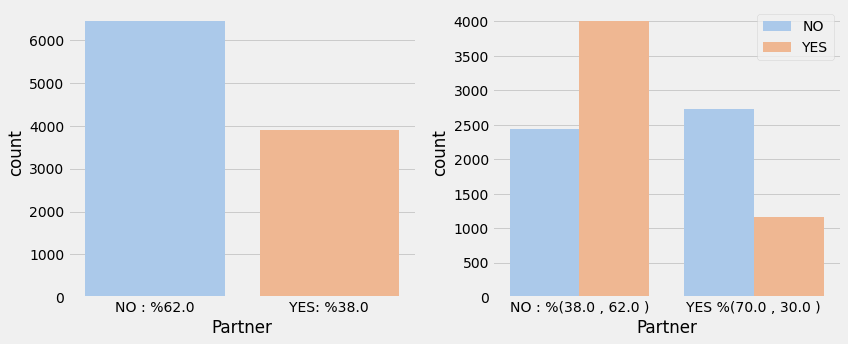

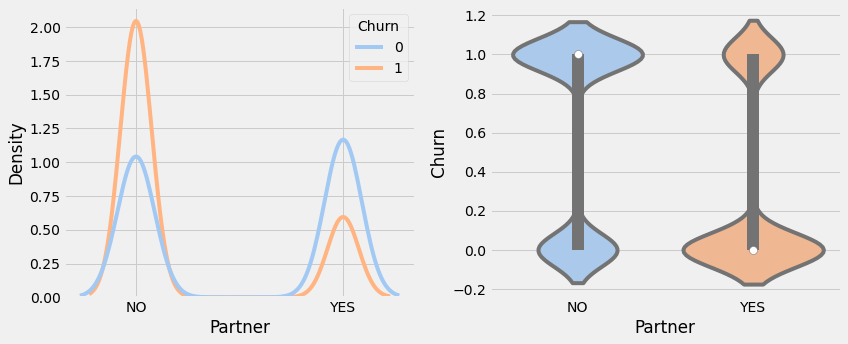

In [1962]:

plt.figure(figsize=(12,5))

probility_ = round(x_over['Partner'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['Partner'],palette='pastel')
plt.xticks([0,1],['NO : %'+str(probility_[0]),'YES: %'+str(probility_[1])])



Partner_N= round((x_over[x_over['Partner']==0]['Churn'].value_counts()/x_over['Partner'].value_counts()[0])*100)
Partner_Y =round( (x_over[x_over['Partner']==1]['Churn'].value_counts()/ x_over['Partner'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['Partner'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO : %(' + str(Partner_N[0]) + ' , '+ str(Partner_N[1])+' )',
                  'YES %(' + str(Partner_Y[0]) + ' , '+ str(Partner_Y[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['Partner'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])
plt.subplot(1,2,2)
sb.violinplot(x_over['Partner'],y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])

plt.tight_layout()


#### OBSERVATIONS:
    - Partner shows correlation with Churn as observed Customer with no partner are more like to Churn (62% probability).
        Customer With partner are more like to not churn (70% probability).
    - 60% of customers seem to have no partner and are indivials .
    - As seen in kde and violin plt and KDE plot, No partner is more is volume in Churn Yes, and PArtner Yes is has more Volume in Churn No.
    - Correlation seen between Partner and Churn.
    
    
##### DEPENDENTS

In [1963]:
#### Visualizing Relationship between Dependants ands Churn Rate.

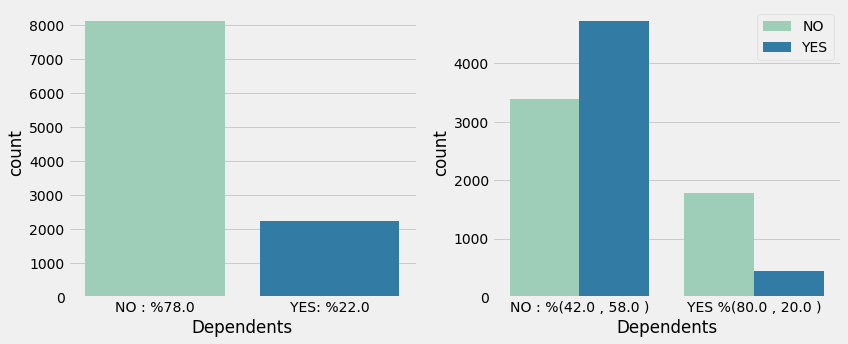

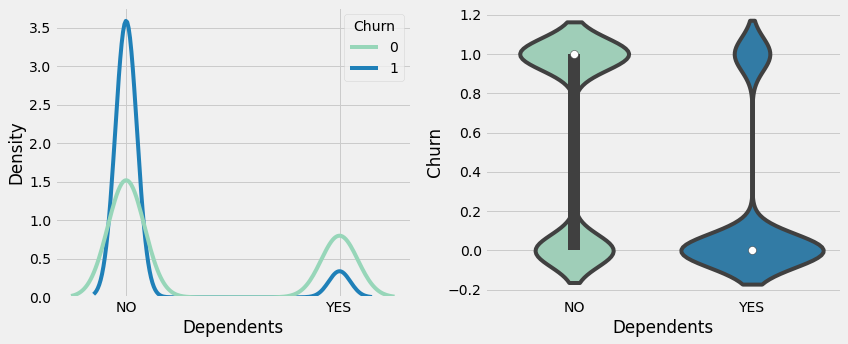

In [1964]:

plt.figure(figsize=(12,5))

probility_ = round(x_over['Dependents'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['Dependents'],palette='YlGnBu')
plt.xticks([0,1],['NO : %'+str(probility_[0]),'YES: %'+str(probility_[1])])



Dependant_N= round((x_over[x_over['Dependents']==0]['Churn'].value_counts()/x_over['Dependents'].value_counts()[0])*100)
Dependant_Y =round( (x_over[x_over['Dependents']==1]['Churn'].value_counts()/ x_over['Dependents'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['Dependents'],hue=y_over,palette='YlGnBu')
plt.xticks([0,1],['NO : %(' + str(Dependant_N[0]) + ' , '+ str(Dependant_N[1])+' )',
                  'YES %(' + str(Dependant_Y[0]) + ' , '+ str(Dependant_Y[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['Dependents'],hue=y_over,palette='YlGnBu')
plt.xticks([0,1],['NO','YES'])
plt.subplot(1,2,2)
sb.violinplot(x_over['Dependents'],y_over,palette='YlGnBu')
plt.xticks([0,1],['NO','YES'])

plt.tight_layout()


#### OBSERVATIONS:
    - Dependants shows correlation with Churn as observed Customer with no Dependants have higher  Churn RAte than dependants.
        Customer With dependant are more likely not  to churn (80% probability).
    - Probability of with No dependants are more likely to Churn.
    - Correlation seen between Dependants and Churn.
    
    
##### Phone Sevice

In [1965]:
#### Visualizng phone serivce feature and churn Relationaship 

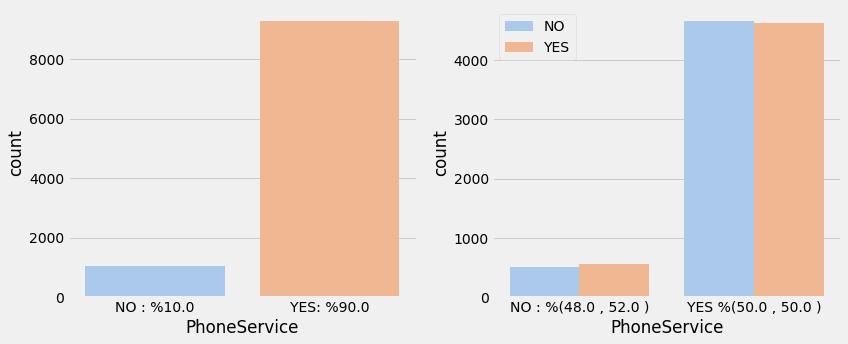

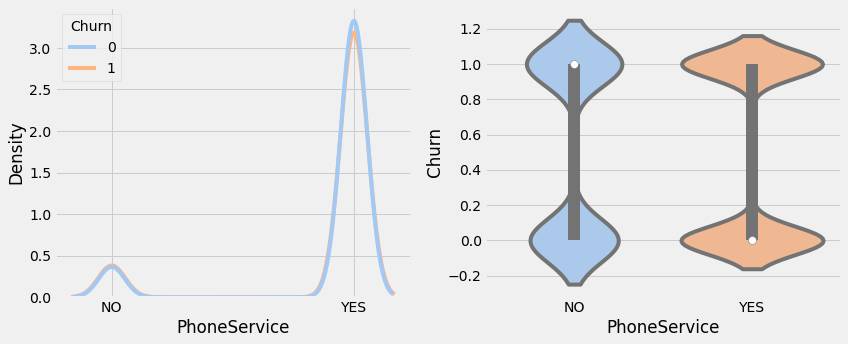

In [1966]:


plt.figure(figsize=(12,5))

probility_ = round(x_over['PhoneService'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['PhoneService'],palette='pastel')
plt.xticks([0,1],['NO : %'+str(probility_[0]),'YES: %'+str(probility_[1])])



PhoneService_N= round((x_over[x_over['PhoneService']==0]['Churn'].value_counts()/x_over['PhoneService'].value_counts()[0])*100)
PhoneService_Y =round( (x_over[x_over['PhoneService']==1]['Churn'].value_counts()/ x_over['PhoneService'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['PhoneService'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO : %(' + str(PhoneService_N[0]) + ' , '+ str(PhoneService_N[1])+' )',
                  'YES %(' + str(PhoneService_Y[0]) + ' , '+ str(PhoneService_Y[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['PhoneService'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])
plt.subplot(1,2,2)
sb.violinplot(x_over['PhoneService'],y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])

plt.tight_layout()


#### OBSERVATIONS:
    - 89% of custsomers are with Phone Serivce.
    - Between phone service Yes and No , churn rate of Both is equal 50:50 probability.
    - Phone service has same volume of Data is Yes and NO Churn. Suggesting  : Phnoe serivce Doesnot have any relation with Churn Rate.
    
#### PAPERLESS BILLING YES/NO

In [1967]:
#### Relation ship of paperless billing with ChurnRate

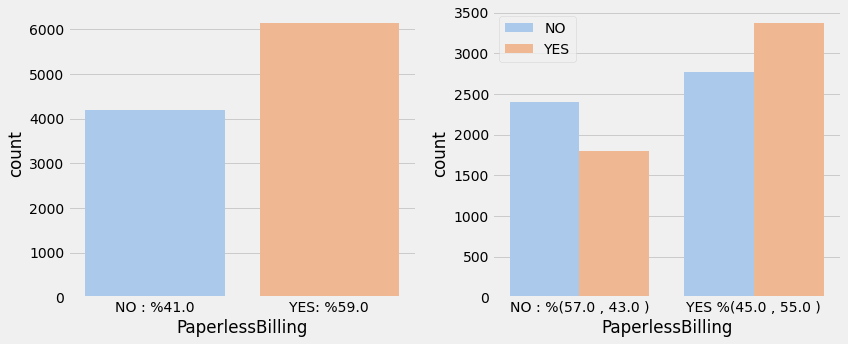

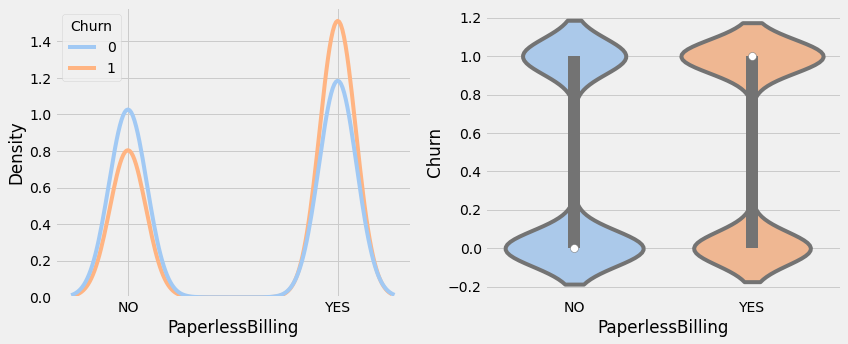

In [1968]:


plt.figure(figsize=(12,5))

probility_ = round(x_over['PaperlessBilling'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['PaperlessBilling'],palette='pastel')
plt.xticks([0,1],['NO : %'+str(probility_[0]),'YES: %'+str(probility_[1])])



Paperless_bill_N= round((x_over[x_over['PaperlessBilling']==0]['Churn'].value_counts()/x_over['PaperlessBilling'].value_counts()[0])*100)
Paperless_bill_Y =round( (x_over[x_over['PaperlessBilling']==1]['Churn'].value_counts()/ x_over['PaperlessBilling'].value_counts()[1])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['PaperlessBilling'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO : %(' + str(Paperless_bill_N[0]) + ' , '+ str(Paperless_bill_N[1])+' )',
                  'YES %(' + str(Paperless_bill_Y[0]) + ' , '+ str(Paperless_bill_Y[1])+' )'])
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.kdeplot(x_over['PaperlessBilling'],hue=y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])
plt.subplot(1,2,2)
sb.violinplot(x_over['PaperlessBilling'],y_over,palette='pastel')
plt.xticks([0,1],['NO','YES'])

plt.tight_layout()


#### OBSERVATIONS:
    -- 59% of Customers go with paperless Billing.
    --Customers with Paperless billing have higher churn rate while,
    -- CUstomer not  with paperless billing higher not to churnRate.
    
    
##### MULTIPLE LINES

In [1969]:
#### Visualizing Multiple Lines relationship with ChurnRAte

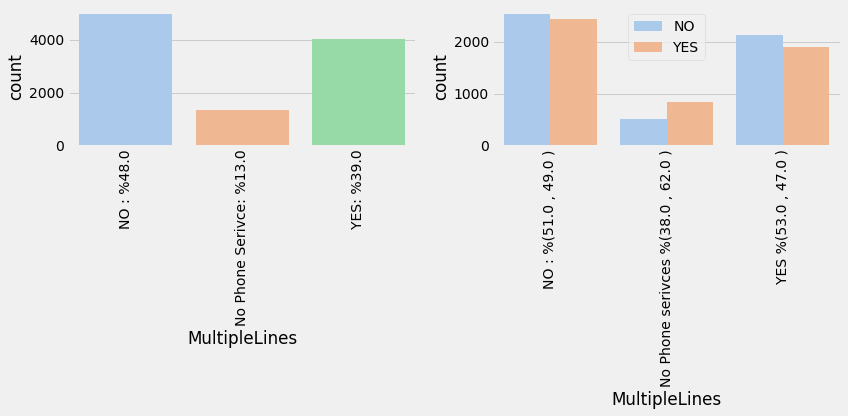

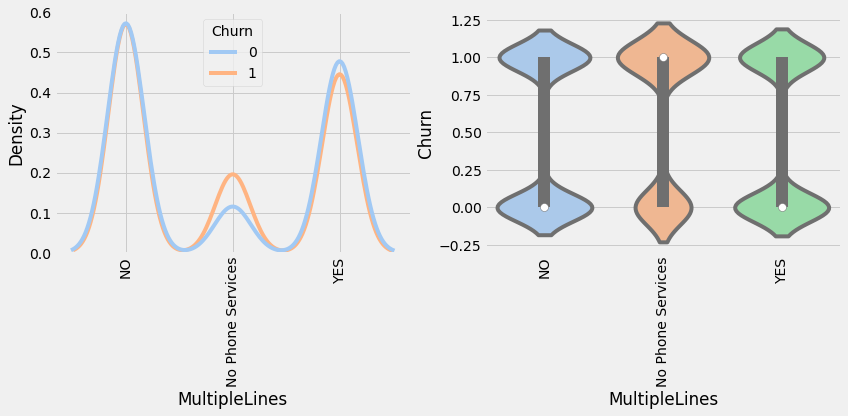

In [1970]:


plt.figure(figsize=(12,6))

probility_ = round(x_over['MultipleLines'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['MultipleLines'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Phone Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=90)



MultipleLines_N= round((x_over[x_over['MultipleLines']==0]['Churn'].value_counts()/x_over['MultipleLines'].value_counts()[0])*100)
MultipleLines_NoPhone= round((x_over[x_over['MultipleLines']==1]['Churn'].value_counts()/x_over['MultipleLines'].value_counts()[1])*100)
MultipleLines_Y =round( (x_over[x_over['MultipleLines']==2]['Churn'].value_counts()/ x_over['MultipleLines'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['MultipleLines'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(MultipleLines_N[0]) + ' , '+ str(MultipleLines_N[1])+' )',
                  'No Phone serivces %(' + str(MultipleLines_NoPhone[0]) + ' , '+ str(MultipleLines_NoPhone[1])+' )',
                    'YES %(' + str(MultipleLines_Y[0]) + ' , '+ str(MultipleLines_Y[1])+' )' ]
           ,rotation=90)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['MultipleLines'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Phone Services','YES'],rotation=90)
plt.subplot(1,2,2)
sb.violinplot(x_over['MultipleLines'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Phone Services','YES'],rotation=90)

plt.tight_layout()


#### OBSERVATIONS:
    - Churn Rate of no serivces is higher than multiple lines yes/no.
    - low volume of data points for no phone services for No Churn .
    - Highest count of Custermors are with Phone serives but No Multiple Lines.
    - Probability of people having phone services and multiple lines Yes/ No are equal, not much influence on Target Variable.
  
##### INTERNET SERVICES

In [1823]:
## relationship between internet services and churn rate

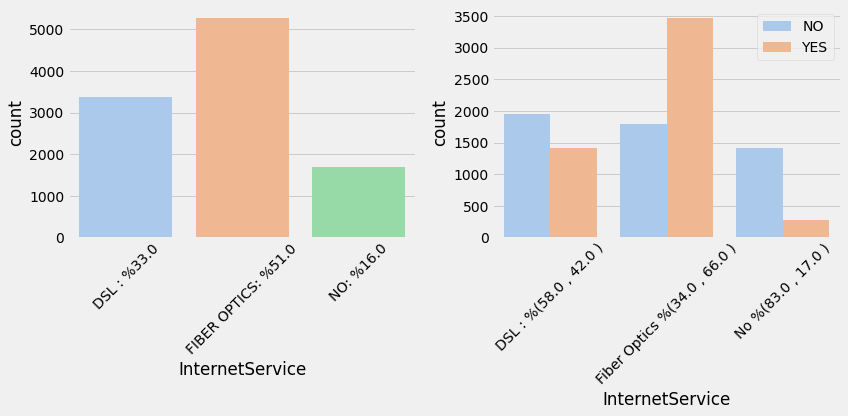

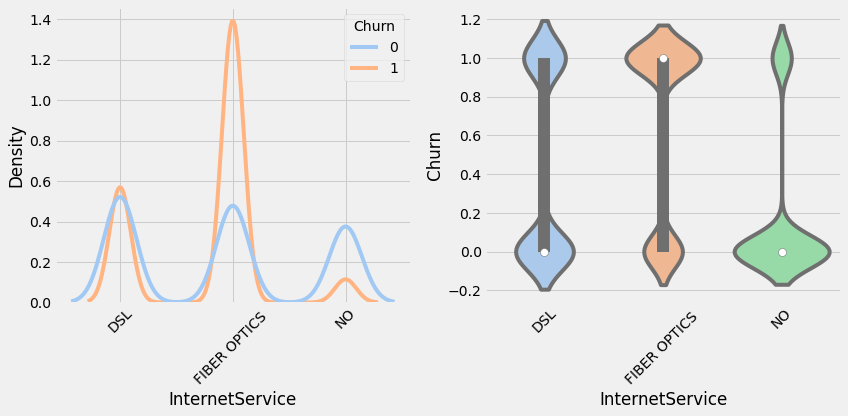

In [1824]:
plt.figure(figsize=(12,6))

probility_ = round(x_over['InternetService'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['InternetService'],palette='pastel')
plt.xticks([0,1,2],['DSL : %'+str(probility_[0]),
                    'FIBER OPTICS: %'+str(probility_[1]),'NO: %'+str(probility_[2])]
               ,rotation=45)



InternetService_dsl= round((x_over[x_over['InternetService']==0]['Churn'].value_counts()/x_over['InternetService'].value_counts()[0])*100)
InternetService_fo= round((x_over[x_over['InternetService']==1]['Churn'].value_counts()/x_over['InternetService'].value_counts()[1])*100)
InternetService_n =round( (x_over[x_over['InternetService']==2]['Churn'].value_counts()/ x_over['InternetService'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['InternetService'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['DSL : %(' + str(InternetService_dsl[0]) + ' , '+ str(InternetService_dsl[1])+' )',
                  'Fiber Optics %(' + str(InternetService_fo[0]) + ' , '+ str(InternetService_fo[1])+' )',
                    'No %(' + str(InternetService_n[0]) + ' , '+ str(InternetService_n[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['InternetService'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['DSL','FIBER OPTICS ','NO'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['InternetService'],y_over,palette='pastel')
plt.xticks([0,1,2],['DSL','FIBER OPTICS ','NO'],rotation=45)

plt.tight_layout()


##### OBSERVATION:
    - Internet Service Shows relationship with ChurnRate.
    - Fiber Optic INternet serivce provider are most like to Churn with 66% probability.
    - No Internet Service have high Churnrate with 84% probability.
    - DSL is influencing more toward Churn rate with 58% probability.
    - Amoung Churn Rate, more likely to be fiber optics then dsl then at least No interent.
    - No churn more likely to belong in heavy density in no interent then dsl thna very least qith fiber optics.
    
##### Online security

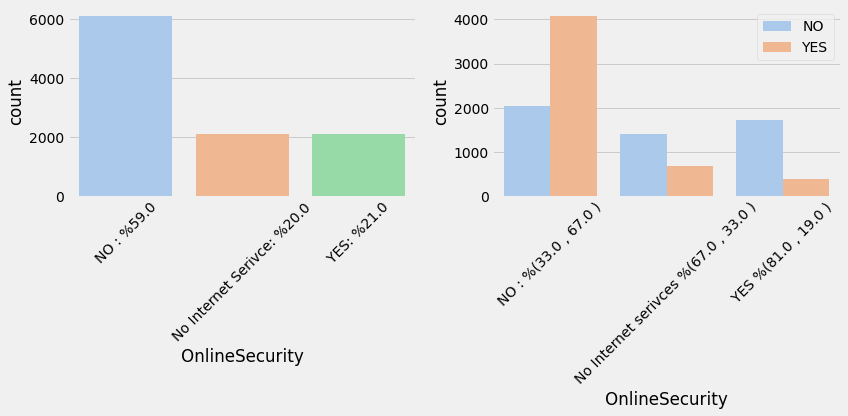

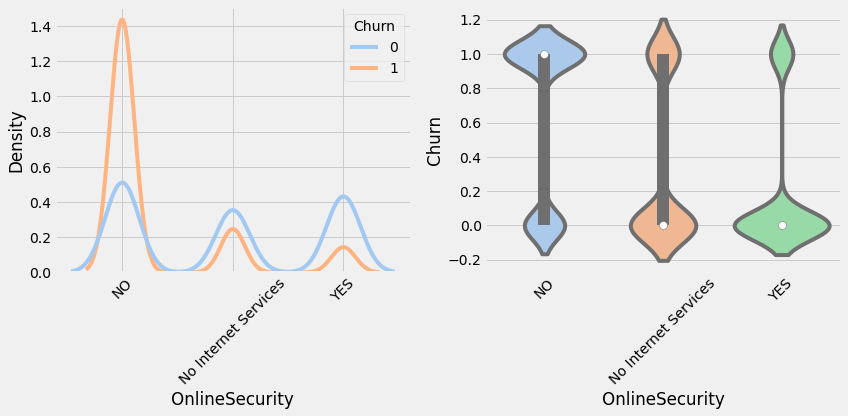

In [1825]:
# vizualization of relationaship between online security and churn rate


plt.figure(figsize=(12,6))

probility_ = round(x_over['OnlineSecurity'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['OnlineSecurity'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



OnlineSecurity_N= round((x_over[x_over['OnlineSecurity']==0]['Churn'].value_counts()/x_over['OnlineSecurity'].value_counts()[0])*100)
OnlineSecurity_no_is= round((x_over[x_over['OnlineSecurity']==1]['Churn'].value_counts()/x_over['OnlineSecurity'].value_counts()[1])*100)
OnlineSecurity_Y =round( (x_over[x_over['OnlineSecurity']==2]['Churn'].value_counts()/ x_over['OnlineSecurity'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['OnlineSecurity'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(OnlineSecurity_N[0]) + ' , '+ str(OnlineSecurity_N[1])+' )',
                  'No Internet serivces %(' + str(OnlineSecurity_no_is[0]) + ' , '+ str(OnlineSecurity_no_is[1])+' )',
                    'YES %(' + str(OnlineSecurity_Y[0]) + ' , '+ str(OnlineSecurity_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['OnlineSecurity'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['OnlineSecurity'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


#### OBSERVATIONS:
    -- Customers Having Internet Service but No Online Security have High Churn Rate around 67%.
    -- Customer Having Online Security have higher No churn rate around 81%.
    - Onlnie Security has moderate relationship with churnrate.
    
#### ONLINE BACKUP FEATURE

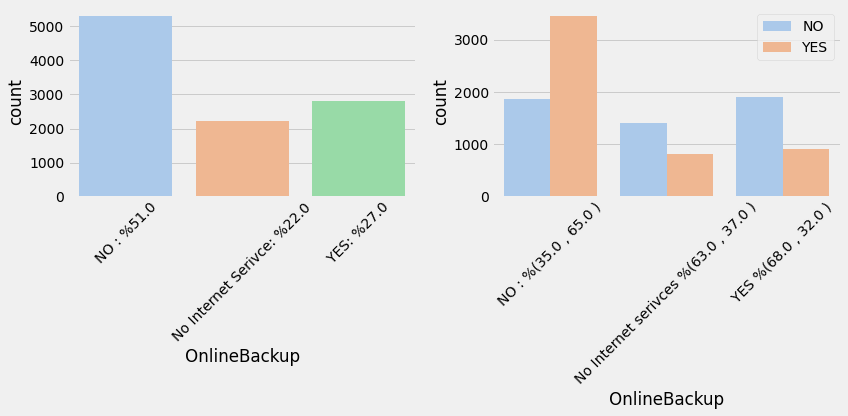

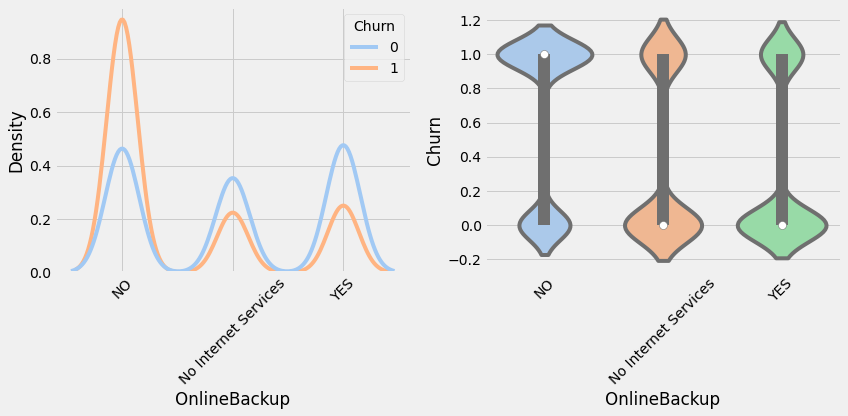

In [1826]:

### Visualizing online Backup and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['OnlineBackup'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['OnlineBackup'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



OnlineBackup_N= round((x_over[x_over['OnlineBackup']==0]['Churn'].value_counts()/x_over['OnlineBackup'].value_counts()[0])*100)
OnlineBackup_no_is= round((x_over[x_over['OnlineBackup']==1]['Churn'].value_counts()/x_over['OnlineBackup'].value_counts()[1])*100)
OnlineBackup_Y =round( (x_over[x_over['OnlineBackup']==2]['Churn'].value_counts()/ x_over['OnlineBackup'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['OnlineBackup'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(OnlineBackup_N[0]) + ' , '+ str(OnlineBackup_N[1])+' )',
                  'No Internet serivces %(' + str(OnlineBackup_no_is[0]) + ' , '+ str(OnlineBackup_no_is[1])+' )',
                    'YES %(' + str(OnlineBackup_Y[0]) + ' , '+ str(OnlineBackup_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['OnlineBackup'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['OnlineBackup'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


##### OBSERVATIONS:
    - Customers with Onlnie Backup are more likely to no churn with probability 33%.
    - Customers with (Internet services and no onlineBackup) and No internet  have high churn rate of 65% and 64% respectively.
    
    
    
#### DEVICE PROTECTION

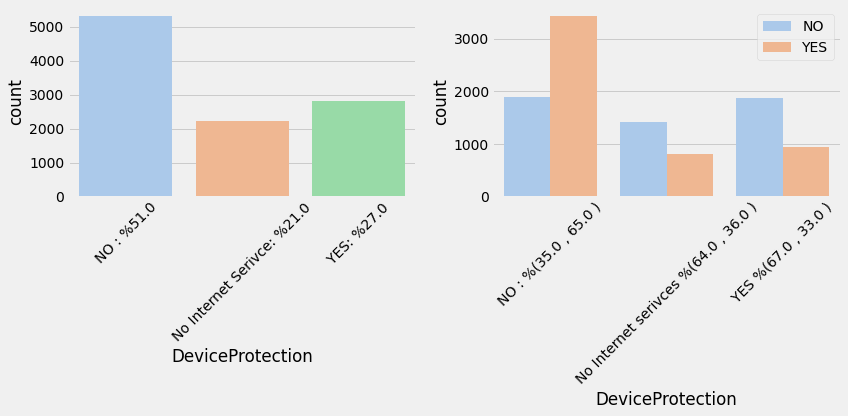

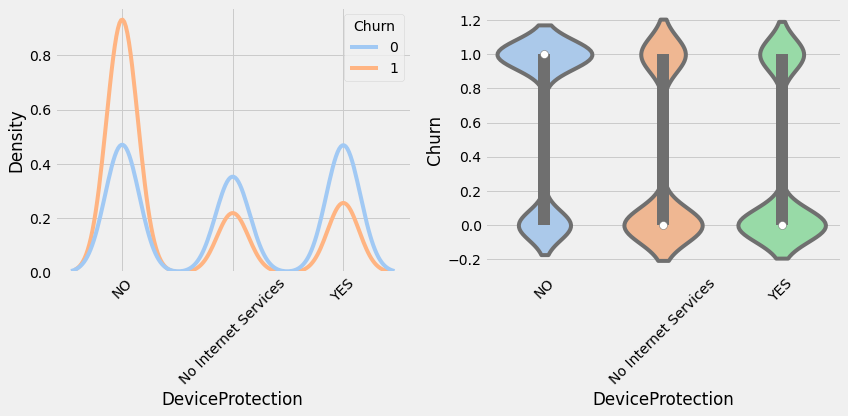

In [1827]:

### Visualizing Device Protection and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['DeviceProtection'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['DeviceProtection'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



DeviceProtection_N= round((x_over[x_over['DeviceProtection']==0]['Churn'].value_counts()/x_over['DeviceProtection'].value_counts()[0])*100)
DeviceProtection_no_is= round((x_over[x_over['DeviceProtection']==1]['Churn'].value_counts()/x_over['DeviceProtection'].value_counts()[1])*100)
DeviceProtection_Y =round( (x_over[x_over['DeviceProtection']==2]['Churn'].value_counts()/ x_over['DeviceProtection'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['DeviceProtection'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(DeviceProtection_N[0]) + ' , '+ str(DeviceProtection_N[1])+' )',
                  'No Internet serivces %(' + str(DeviceProtection_no_is[0]) + ' , '+ str(DeviceProtection_no_is[1])+' )',
                    'YES %(' + str(DeviceProtection_Y[0]) + ' , '+ str(DeviceProtection_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['DeviceProtection'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['DeviceProtection'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


##### OBSERVATIONS:
    - Customers with DeviceProtection are more likely to not churn with probability 34%.
    - Customers with (Internet services and no DeviceProtection) and No internet  have high churn rate of 64%.
    - Customers with No internet Serivces also have high churn rate of 64%.
    - you can observe high volume of Data in Churn Yes with Device Protection No .
    
        
#### TECH SUPPORT

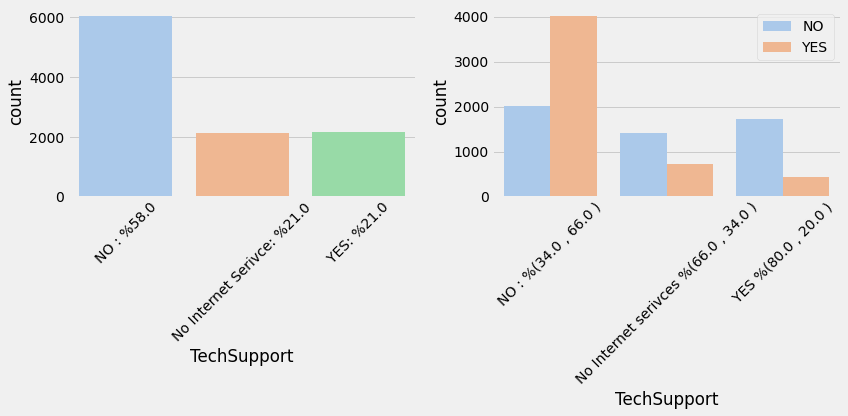

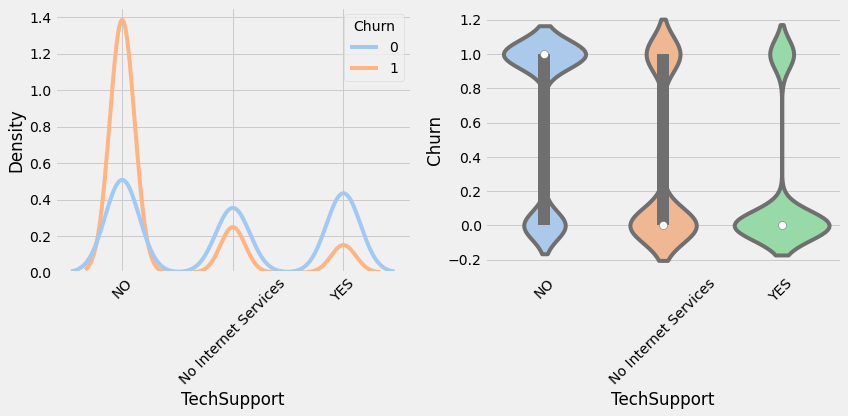

In [1828]:

### Visualizing TECH SUPPORT and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['TechSupport'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['TechSupport'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



ts_N= round((x_over[x_over['TechSupport']==0]['Churn'].value_counts()/x_over['TechSupport'].value_counts()[0])*100)
ts_no_is= round((x_over[x_over['TechSupport']==1]['Churn'].value_counts()/x_over['TechSupport'].value_counts()[1])*100)
ts_Y =round( (x_over[x_over['TechSupport']==2]['Churn'].value_counts()/ x_over['TechSupport'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['TechSupport'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(ts_N[0]) + ' , '+ str(ts_N[1])+' )',
                  'No Internet serivces %(' + str(ts_no_is[0]) + ' , '+ str(ts_no_is[1])+' )',
                    'YES %(' + str(ts_Y[0]) + ' , '+ str(ts_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['TechSupport'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['TechSupport'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


##### OBSERVATIONS:
    - Customers with NO Tech Support HAs higher churn Rate of 67%.
    - Customers with Tech suppose are more like to not churn with 19% churn rate.
    


#### STREAMING TV

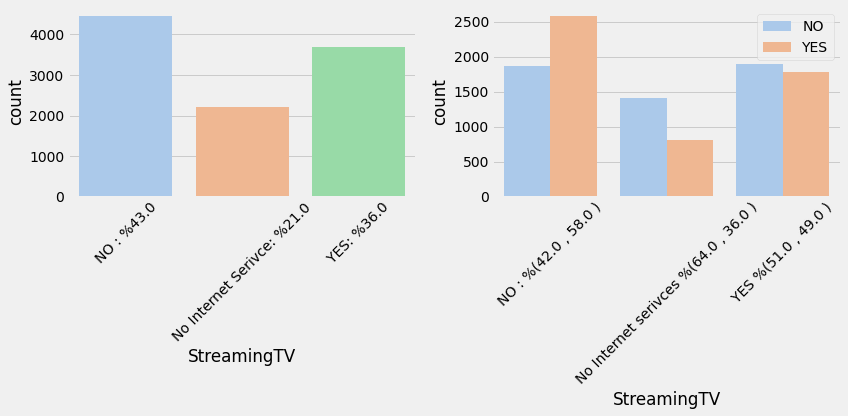

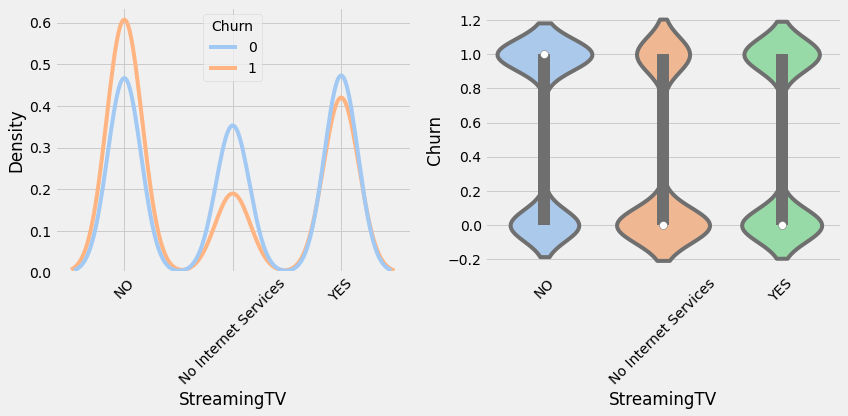

In [1829]:

### Visualizing Streaming TV and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['StreamingTV'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['StreamingTV'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



streamingTv_N= round((x_over[x_over['StreamingTV']==0]['Churn'].value_counts()/x_over['StreamingTV'].value_counts()[0])*100)
streamingTv_no_is= round((x_over[x_over['StreamingTV']==1]['Churn'].value_counts()/x_over['StreamingTV'].value_counts()[1])*100)
streamingTv_Y =round( (x_over[x_over['StreamingTV']==2]['Churn'].value_counts()/ x_over['StreamingTV'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['StreamingTV'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(streamingTv_N[0]) + ' , '+ str(streamingTv_N[1])+' )',
                  'No Internet serivces %(' + str(streamingTv_no_is[0]) + ' , '+ str(streamingTv_no_is[1])+' )',
                    'YES %(' + str(streamingTv_Y[0]) + ' , '+ str(streamingTv_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['StreamingTV'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['StreamingTV'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


#### OBSERVATIONS:
    -- Customer having no Streaming TV have higher churn rate of 59%.
    -- Customers having no internet service has less churn rate of 35%.
    - Customers having Streaming tc has equal probability to equal probability to churn or not to churn.
    
    -- Less relationship seen with churnrate.



##### STREAMING MOVIES

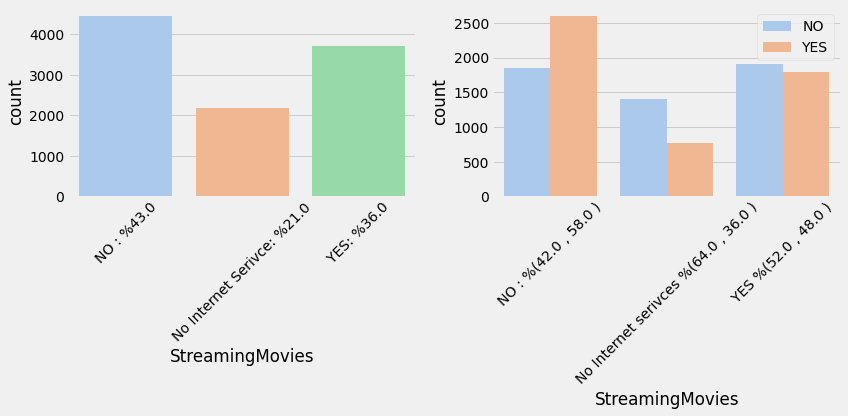

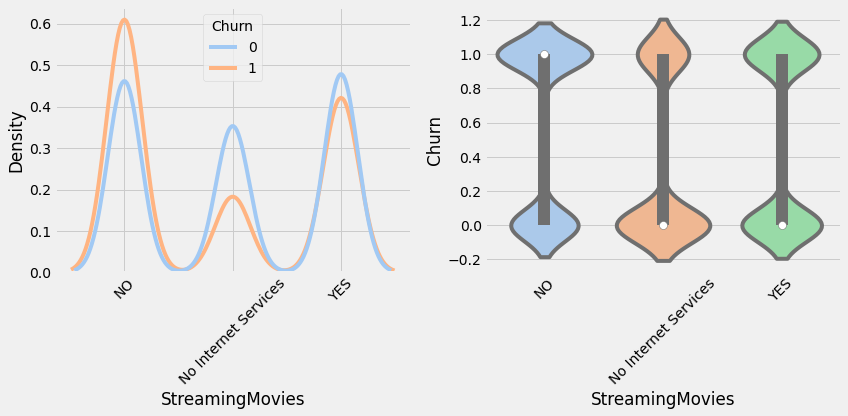

In [1830]:

### Visualizing Streaming TV and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['StreamingMovies'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['StreamingMovies'],palette='pastel')
plt.xticks([0,1,2],['NO : %'+str(probility_[0]),
                    'No Internet Serivce: %'+str(probility_[1]),'YES: %'+str(probility_[2])]
               ,rotation=45)



streamingMovies_N= round((x_over[x_over['StreamingMovies']==0]['Churn'].value_counts()/x_over['StreamingMovies'].value_counts()[0])*100)
streamingMovies_no_is= round((x_over[x_over['StreamingMovies']==1]['Churn'].value_counts()/x_over['StreamingMovies'].value_counts()[1])*100)
streamingMovies_Y =round( (x_over[x_over['StreamingMovies']==2]['Churn'].value_counts()/ x_over['StreamingMovies'].value_counts()[2])*100)

plt.subplot(1,2,2)
sb.countplot(x_over['StreamingMovies'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO : %(' + str(streamingMovies_N[0]) + ' , '+ str(streamingMovies_N[1])+' )',
                  'No Internet serivces %(' + str(streamingMovies_no_is[0]) + ' , '+ str(streamingMovies_no_is[1])+' )',
                    'YES %(' + str(streamingMovies_Y[0]) + ' , '+ str(streamingMovies_Y[1])+' )' ]
           ,rotation=45)
plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['StreamingMovies'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['StreamingMovies'],y_over,palette='pastel')
plt.xticks([0,1,2],['NO','No Internet Services','YES'],rotation=45)

plt.tight_layout()


#### OBSERVATIONS:
    -- Customer having no Streaming Movies have higher churn rate of 59%.
    -- Customers having no internet service has less churn rate of 35%.
    - Customers having StreamingMovies  has equal probability to equal probability to churn or not to churn.
    
    -- Less relationship seen with churnrate.


##### CONTRACT

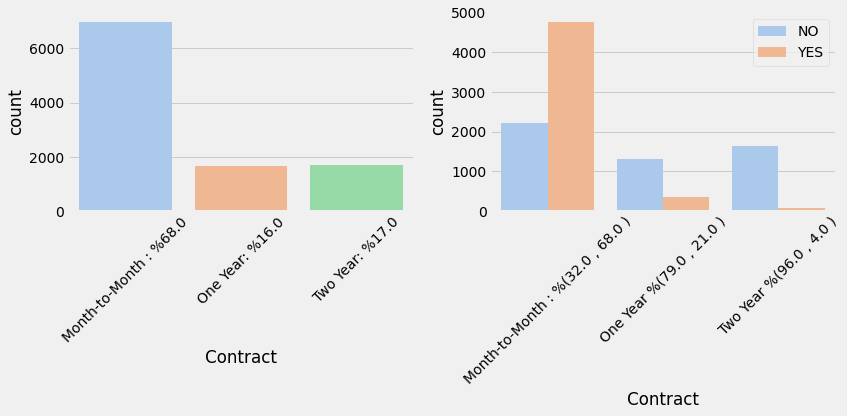

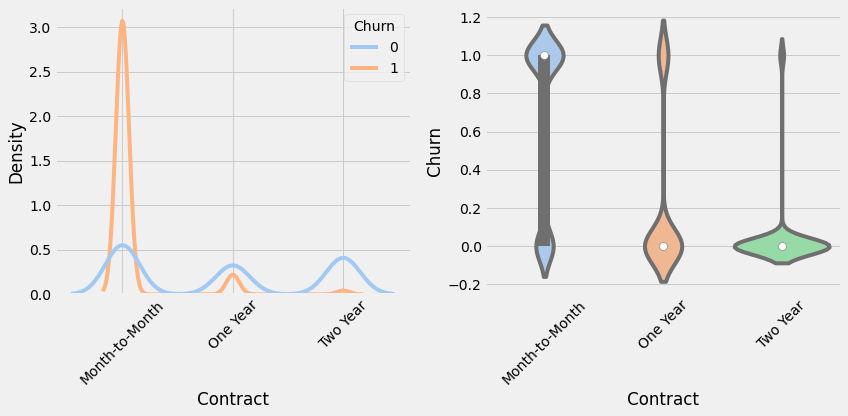

In [1831]:

### Visualizing contract type and Churn rate relationship.

plt.figure(figsize=(12,6))

probility_ = round(x_over['Contract'].value_counts()/ len(x_over)*100)

plt.subplot(1,2,1)
sb.countplot(x_over['Contract'],palette='pastel')
plt.xticks([0,1,2],['Month-to-Month : %'+str(probility_[0]),
                    'One Year: %'+str(probility_[1]),'Two Year: %'+str(probility_[2])]
               ,rotation=45)



contract_month= round((x_over[x_over['Contract']==0]['Churn'].value_counts()/x_over['Contract'].value_counts()[0])*100)
contract_1= round((x_over[x_over['Contract']==1]['Churn'].value_counts()/x_over['Contract'].value_counts()[1])*100)
contract_2=round( (x_over[x_over['Contract']==2]['Churn'].value_counts()/ x_over['Contract'].value_counts()[2])*100)


plt.subplot(1,2,2)
sb.countplot(x_over['Contract'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['Month-to-Month : %(' + str(contract_month[0]) + ' , '+ str(contract_month[1])+' )',
                  'One Year %(' + str(contract_1[0]) + ' , '+ str(contract_1[1])+' )',
                    'Two Year %(' + str(contract_2[0]) + ' , '+ str(contract_2[1])+' )' ]
           ,rotation=45)


plt.legend(['NO','YES'])
plt.tight_layout()


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.kdeplot(x_over['Contract'],hue=y_over,palette='pastel')
plt.xticks([0,1,2],['Month-to-Month','One Year','Two Year'],rotation=45)
plt.subplot(1,2,2)
sb.violinplot(x_over['Contract'],y_over,palette='pastel')
plt.xticks([0,1,2],['Month-to-Month','One Year','Two Year'],rotation=45)

plt.tight_layout()


#### OBSERVATIONS:
    - Contract has lowest Churn rate of 4% with 2-Year Contract. 
    Suggesting, customers with 2 - year contractSuggest high probaility of .96 to not churn.
    - One year contract also has same realtion with .8 probability not to churn , 
    - While, month to month contract type seems to have highest churnrate of .68.


####  PAYMENT METHOD

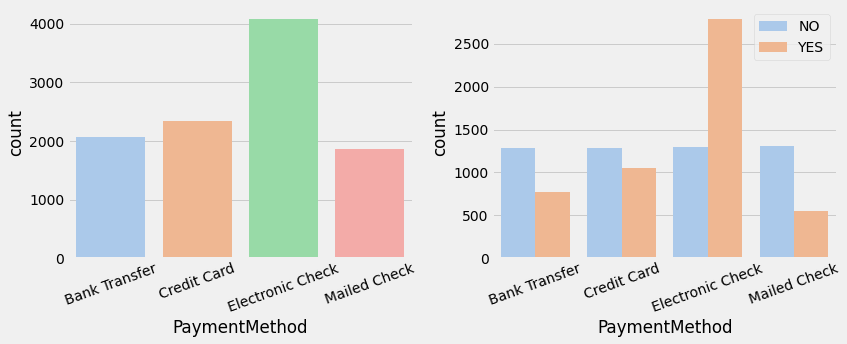

In [1832]:
### Visualizing relationship between payment method and churnrate

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sb.countplot(x_over['PaymentMethod'],palette='pastel')
plt.xticks([0,1,2,3],['Bank Transfer','Credit Card','Electronic Check','Mailed Check'],rotation=20)

plt.subplot(1,2,2)
sb.countplot(x_over['PaymentMethod'],hue=y_over,palette='pastel')
plt.xticks([0,1,2,3],['Bank Transfer','Credit Card','Electronic Check','Mailed Check'],rotation=20)
plt.legend(['NO','YES'])
plt.tight_layout()




##### OBSERVATIONS:
    - Electronic mail has  highest probability to Churn, While mailed check, Bank transfer has highest probability to not Churn.
    - Relationship exist between payment method and churnrate.

#### VIZUALIZING THE CONTINOUS FEATURES

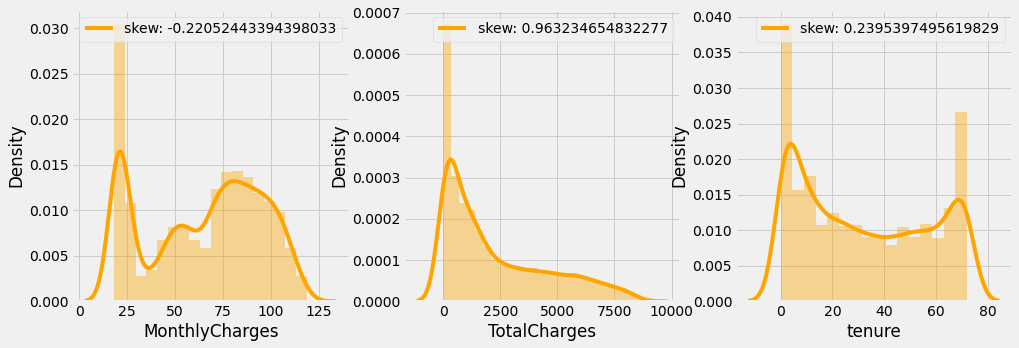

In [1833]:
#Distribution plots of Continous Features to see spread of data.

plt.figure(figsize=(15,5))
k =1
for i in ['MonthlyCharges','TotalCharges','tenure']:
    plt.subplot(1,3,k)
    
    sb.distplot(train[i],color='orange')
    plt.legend(['skew: '+str(train[i].skew())])
    k = k+1

#### Correlation Table

<AxesSubplot:>

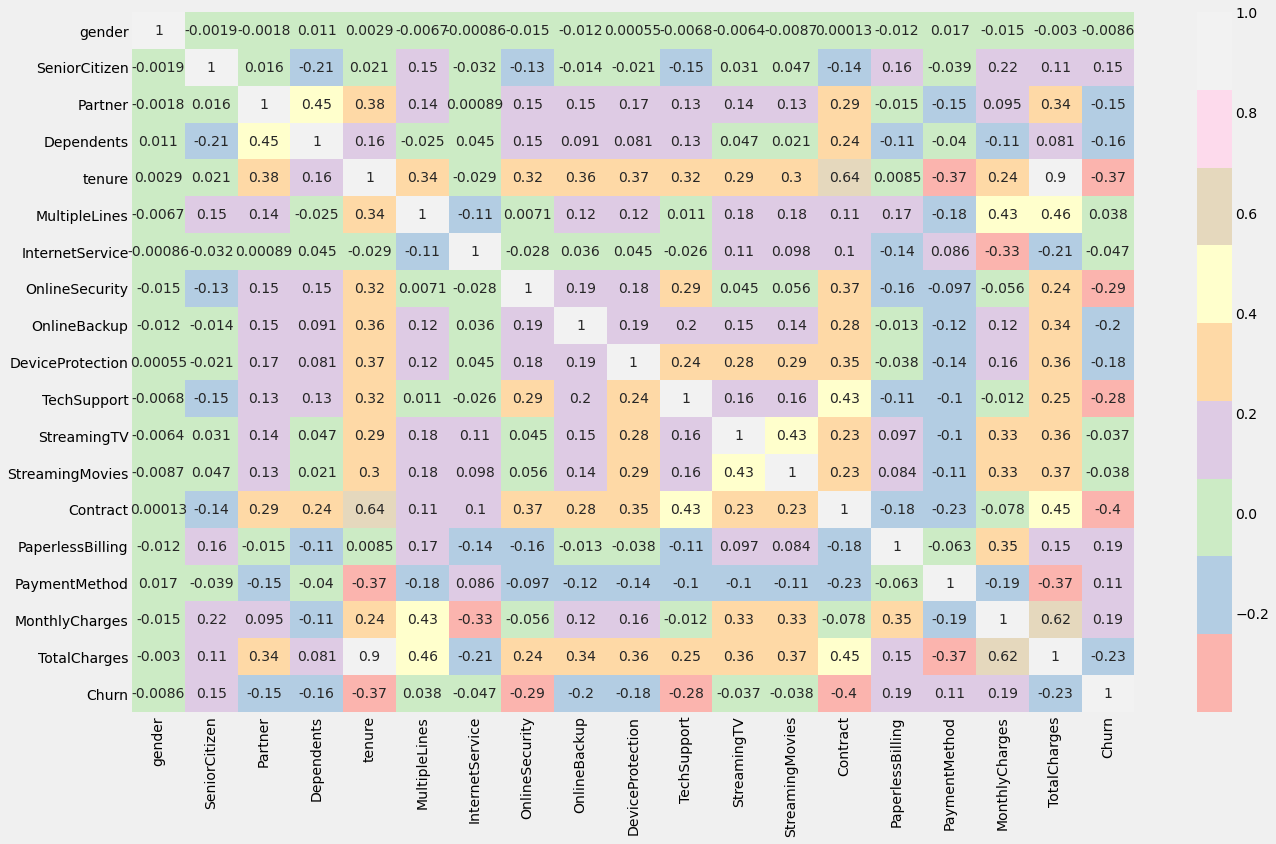

In [1834]:
plt.figure(figsize=(20,12))
sb.heatmap(train1.corr(),annot=True,cmap='Pastel1')

##### OBSERVATIONS:
    - Churn rate has high correlation with Contract, Tech Support, Tenure, Onlnie Security,
    - No reLATION WITH GENDER.
    
    
    -- Multicollinearity exist between:
        - Tenure and Contract, Ttoal Charges and monthly Charges, Multiple Line with Montly Charges/ Ttoal Charges.


#### VIsualizing Relationahip between Features.

([<matplotlib.axis.XTick at 0x15a63fa3bb0>,
 [Text(0, 0, 'no'), Text(1, 0, 'no phone service'), Text(2, 0, 'yes')])

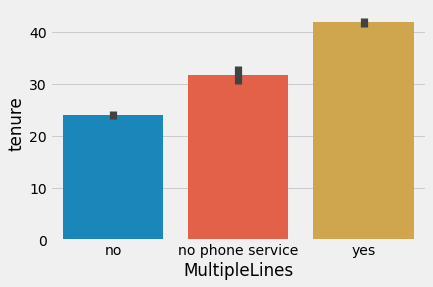

In [1835]:
plt.figure()
sb.barplot(train['MultipleLines'],train['tenure'])
plt.xticks([0,1,2],['no','no phone service','yes'])

##### No miltiple lines have lowest Tenure .

([<matplotlib.axis.XTick at 0x15a63601220>,
 [Text(0, 0, 'month=to-month'),
  Text(1, 0, 'one year'),
  Text(2, 0, 'Two year')])

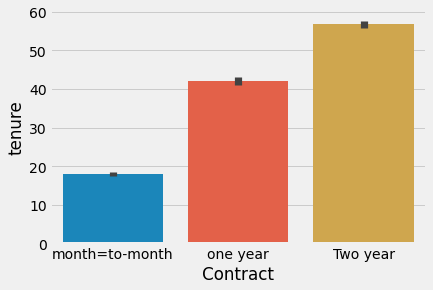

In [1836]:
plt.figure()
sb.barplot(train['Contract'],train['tenure'])
plt.xticks([0,1,2],['month=to-month','one year','Two year'])

#### Average  Tenure of month-to -month contract is lowest and that of two year is highest.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

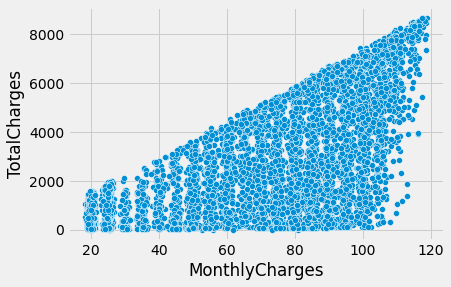

In [1837]:
sb.scatterplot(train['MonthlyCharges'],train['TotalCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

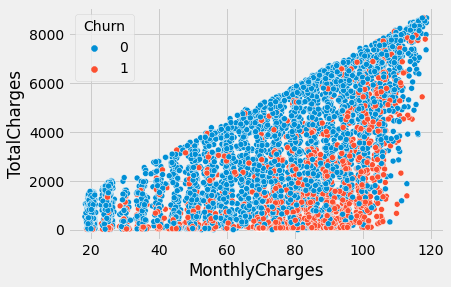

In [1838]:
sb.scatterplot(train['MonthlyCharges'],train['TotalCharges'],hue=train['Churn'])

##### OBSERVATIONS:
    - Customers to churn  are highly concentrated on low values of total charges and high vlaue of Montlhy charges.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

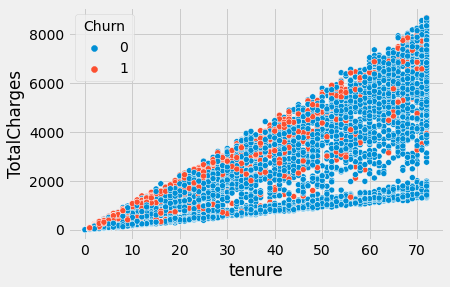

In [1839]:
sb.scatterplot(train['tenure'],train['TotalCharges'],hue=train['Churn'])

##### Customers to churn  highest total Charges as the tenure increases. while customers not churn are scattered for high/ low values of total Charges.

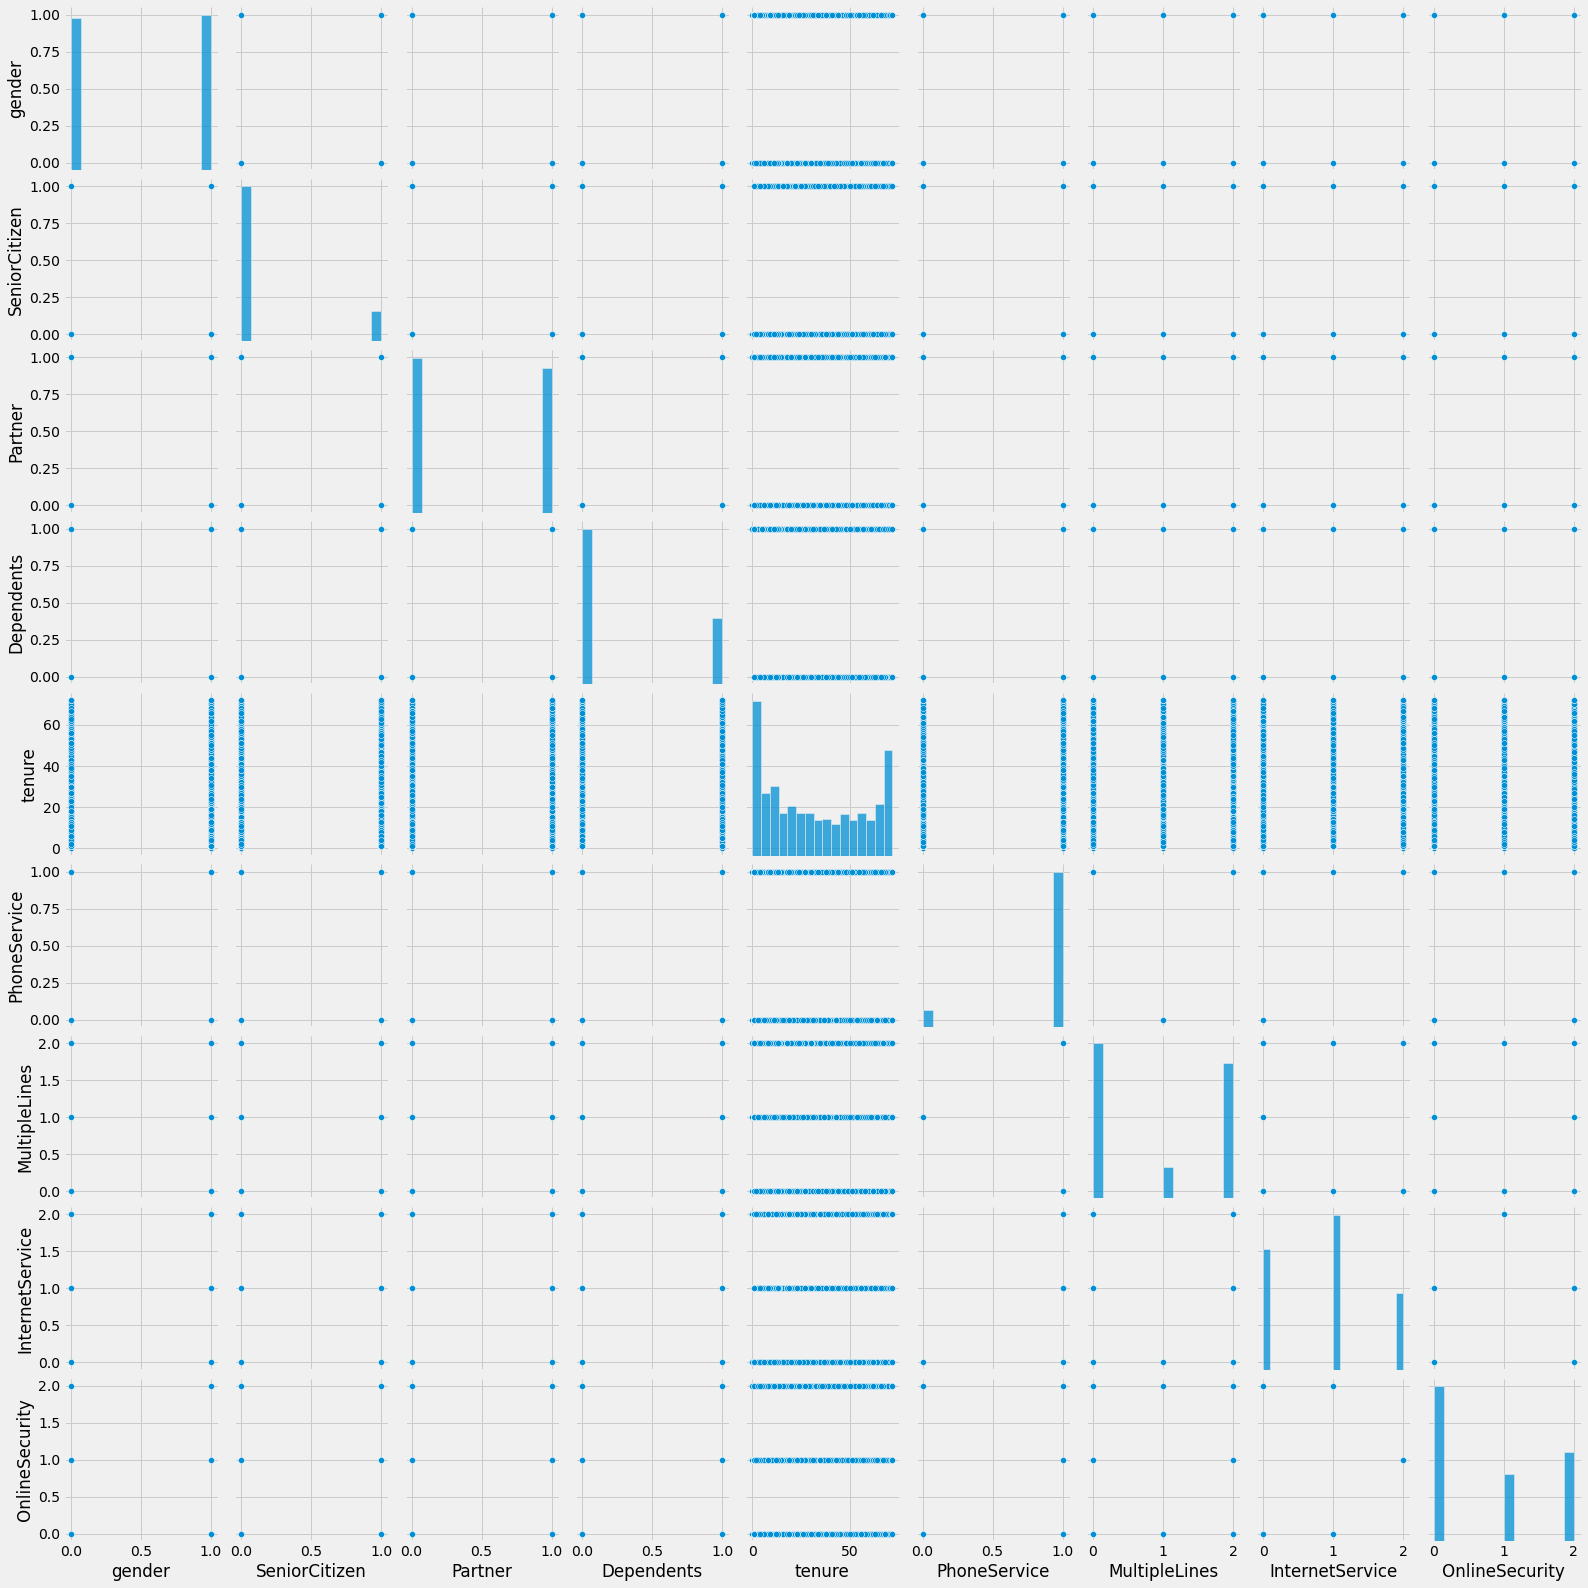

In [1972]:
sb.pairplot(train.iloc[:,:9])

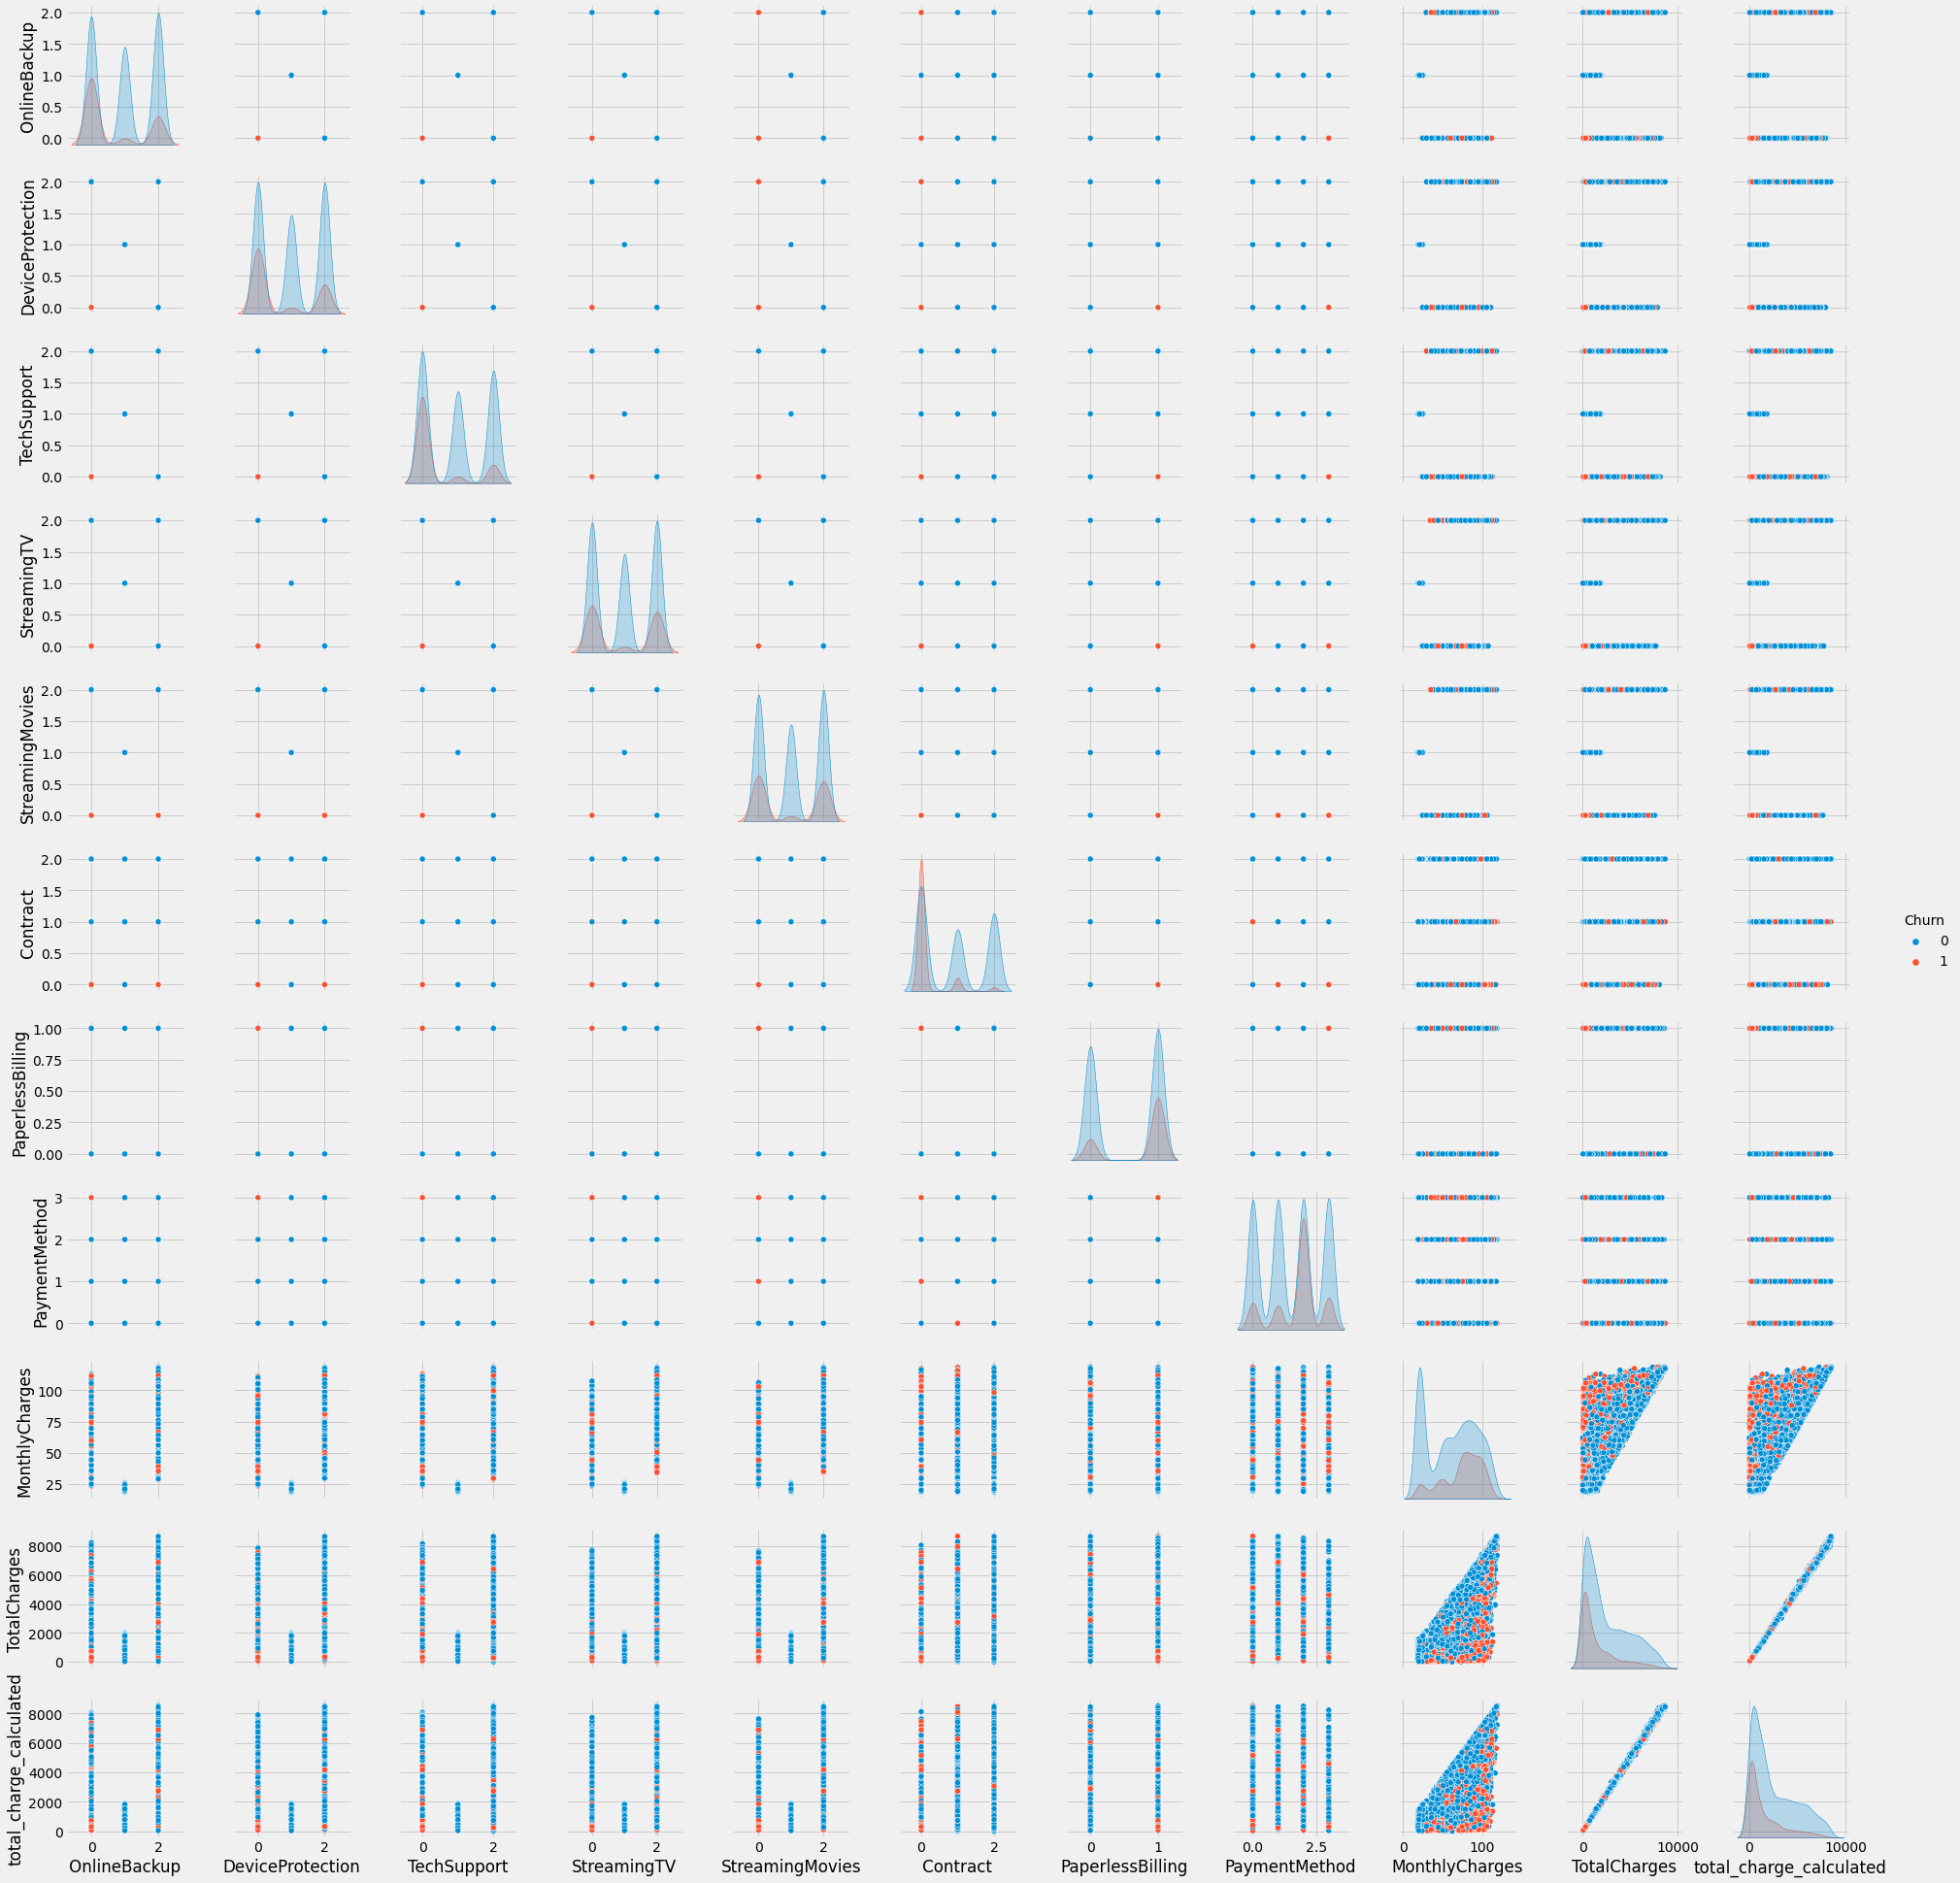

In [1973]:
sb.pairplot(train.iloc[:,9:],hue='Churn')

##### WE CAN DROP ANY OF THE TOTAL CHARGES/ Total_charge_Calculated 

### CHECKING FOR OUTLIERS

In [1842]:
from sklearn.preprocessing import PowerTransformer,StandardScaler
from scipy.stats import zscore

In [1843]:
train.drop('total_charge_calculated',axis=1,inplace=True)

In [1844]:
zscores = np.abs(zscore(train))

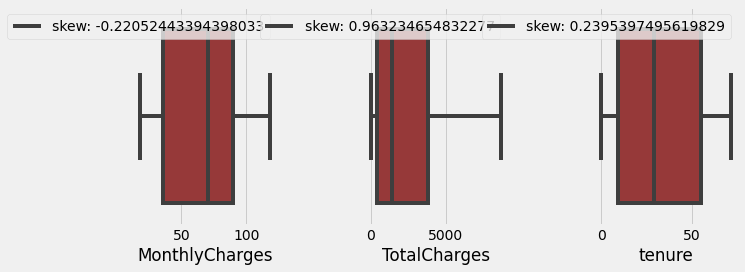

In [1845]:
#Distribution plots of Continous Features to see spread of data.

plt.figure(figsize=(10,4))
k =1
for i in ['MonthlyCharges','TotalCharges','tenure']:
    plt.subplot(1,3,k)
    
    sb.boxplot(train[i],color='brown')
    plt.legend(['skew: '+str(train[i].skew())])
    k = k+1
plt.tight_layout()

In [1846]:
np.where(zscores>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

##### AS WE CAN SEE OUTLIERS ARE PRESETN IN A CATEGORICAL FEATURE, suggesting no need to remove outliers as categorical outliers are not 

In [1847]:
train[['MonthlyCharges','TotalCharges']] = PowerTransformer().fit_transform(train[['MonthlyCharges','TotalCharges']])

In [1848]:
train[['tenure']] = StandardScaler().fit_transform(train[['tenure']])

In [1849]:
train[['MonthlyCharges','TotalCharges','tenure']].skew()

MonthlyCharges   -0.259035
TotalCharges     -0.146121
tenure            0.239540
dtype: float64

##### OUTLIERS ARE HANDLED WITH POWER TRANSFORMER

In [1850]:
train.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.259035
TotalCharges       -0.146121
Churn               1.063031
dtype: float64

In [1851]:
x_over, y_over = SMOTE().fit_resample(train.drop('Churn',axis=1),train['Churn'])

In [1852]:
from sklearn.decomposition import PCA

In [1853]:
pca = PCA().fit(x_over,y_over)

In [1854]:
pca.explained_variance_ratio_

array([0.30408192, 0.13276731, 0.08810392, 0.06686856, 0.05462069,
       0.05114478, 0.04845698, 0.04165546, 0.04042453, 0.03969597,
       0.02975008, 0.02135783, 0.02092841, 0.01772232, 0.01675845,
       0.01101612, 0.00767609, 0.0038813 , 0.00308927])

<BarContainer object of 19 artists>

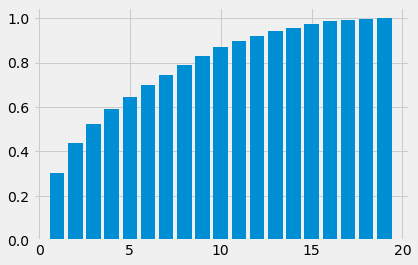

In [1855]:
plt.bar(range(1,20),np.cumsum(pca.explained_variance_ratio_))

#### PCA suggests that around 15 features are neeeded to give more than 95% infomation. and total features are 19.
### FEATURE REDUCTION NOT NEEDED AS NOISE COMPONENT IS VERY LESS.

In [1856]:
x_over.shape,y_over.shape

((10348, 19), (10348,))

### DATA MODELING

    - Find BEST RANDOM STATE
    - EVALUTING ALL MODEL
    
    - As the Classes were orignally imbalanced we need to check accuracy for both the target classes to check biasness toward any minoirty/ majority class. 
    - Evaluation metrics will be f1-score to check precision and recall of both the classes.

In [1857]:
#function to find best random state for any model

def random_state_func(model):
    randomstate = 0
    max_score = 0
    
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = f1_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    return(randomstate,max_score)

In [1858]:
rs,max_score = random_state_func(LGBMClassifier())
print('Random State: ',rs,'MAx Score: ',max_score)

Random State:  60 MAx Score:  0.8423353106462692


In [1886]:
cv_scores = []
auc_roc_scores = []
acc_scores = []
f1_scores = []

In [1887]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state=rs)


In [1888]:
# Method to for algorithm prediction for any model.

def model_predict(model):
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='f1'))
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    acc_scores.append(accuracy_score(y_test,predictions))
    cv_scores.append(cv_score)
    auc_roc_scores.append(roc_auc_score(y_test,pred_proba))
    f1_scores.append(f1_score(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

------------ LogisticRegression() --------------
 Accuracy Score         :  0.8028985507246377
ROC AUC Score           :  0.8771720189195916
Cross Validation Score  :  0.7869902986604612
F1 Score                : 0.81122763726095
Precision Score                : 0.774896876841485
Recall Score                : 0.8511326860841424
              precision    recall  f1-score   support

           0       0.84      0.76      0.79      1560
           1       0.77      0.85      0.81      1545

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105



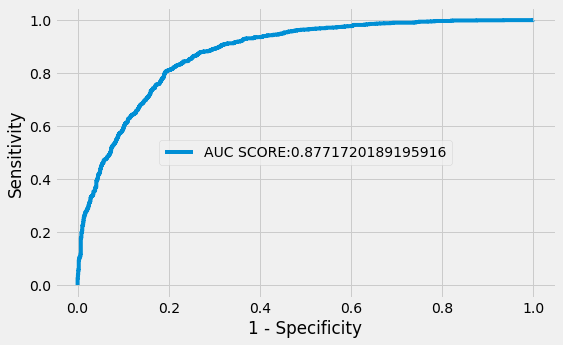

<Figure size 432x288 with 0 Axes>

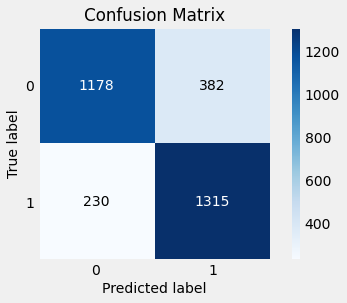

In [1889]:

model_predict(LogisticRegression())

------------ KNeighborsClassifier(n_neighbors=10) --------------
 Accuracy Score         :  0.7974235104669888
ROC AUC Score           :  0.8712920089619118
Cross Validation Score  :  0.7897551468093419
F1 Score                : 0.8109407874962429
Precision Score                : 0.7570145903479237
Recall Score                : 0.8731391585760517
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1560
           1       0.76      0.87      0.81      1545

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



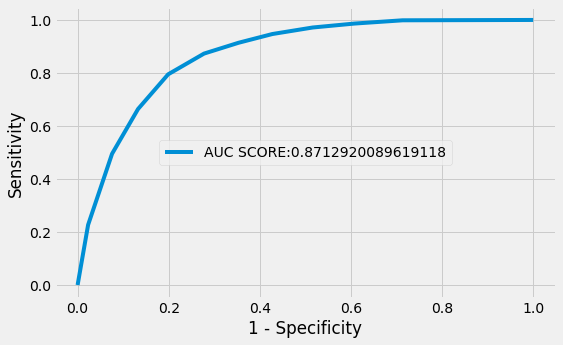

<Figure size 432x288 with 0 Axes>

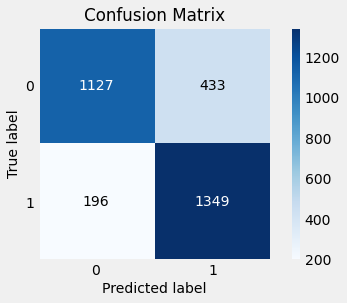

In [1890]:
model_predict(KNeighborsClassifier(n_neighbors=10))

------------ GaussianNB() --------------
 Accuracy Score         :  0.7809983896940419
ROC AUC Score           :  0.8529495477553731
Cross Validation Score  :  0.7735301477403684
F1 Score                : 0.7926829268292683
Precision Score                : 0.7492795389048992
Recall Score                : 0.8414239482200647
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1560
           1       0.75      0.84      0.79      1545

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



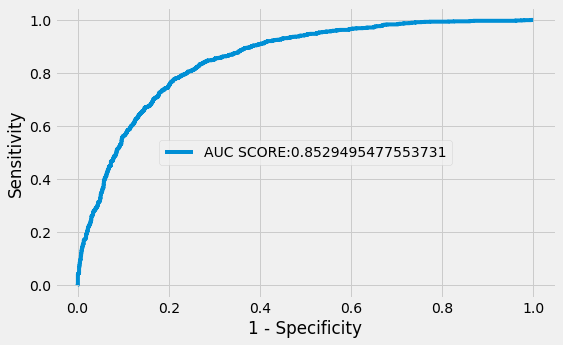

<Figure size 432x288 with 0 Axes>

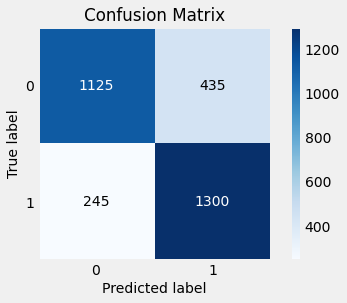

In [1891]:
model_predict(GaussianNB())

------------ SVC(C=10, gamma=0.1, probability=True) --------------
 Accuracy Score         :  0.8260869565217391
ROC AUC Score           :  0.8952607667413492
Cross Validation Score  :  0.8200002097614574
F1 Score                : 0.834862385321101
Precision Score                : 0.7913043478260869
Recall Score                : 0.883495145631068
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1560
           1       0.79      0.88      0.83      1545

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



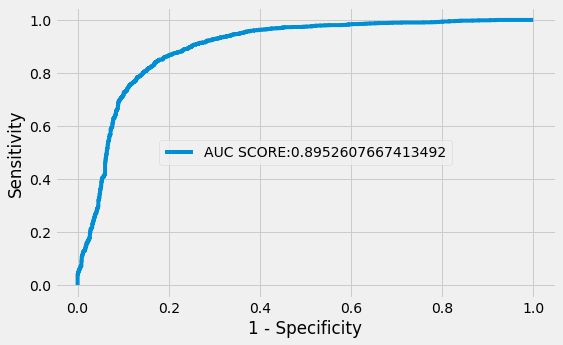

<Figure size 432x288 with 0 Axes>

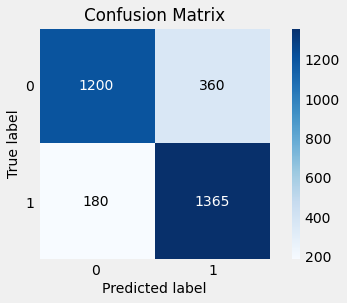

In [1892]:
model_predict(SVC(C=10,gamma=.1,probability=True))

------------ DecisionTreeClassifier() --------------
 Accuracy Score         :  0.7607085346215781
ROC AUC Score           :  0.7620720272176582
Cross Validation Score  :  0.7623914093375859
F1 Score                : 0.7610164039884209
Precision Score                : 0.7563938618925832
Recall Score                : 0.7656957928802589
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1560
           1       0.76      0.77      0.76      1545

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



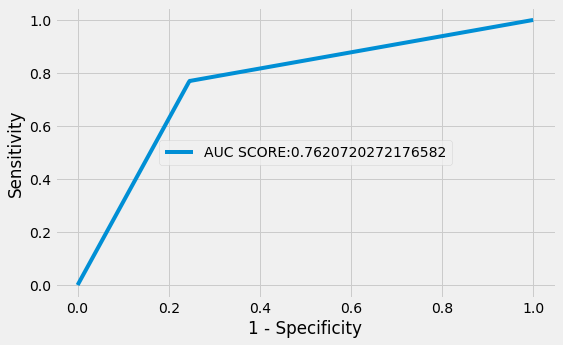

<Figure size 432x288 with 0 Axes>

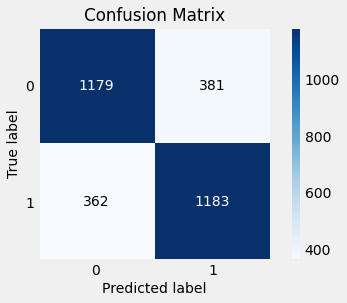

In [1893]:
model_predict(DecisionTreeClassifier())

------------ AdaBoostClassifier() --------------
 Accuracy Score         :  0.8103059581320451
ROC AUC Score           :  0.8812714712471994
Cross Validation Score  :  0.8001640399983799
F1 Score                : 0.8184899845916794
Precision Score                : 0.7811764705882352
Recall Score                : 0.859546925566343
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1560
           1       0.78      0.86      0.82      1545

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



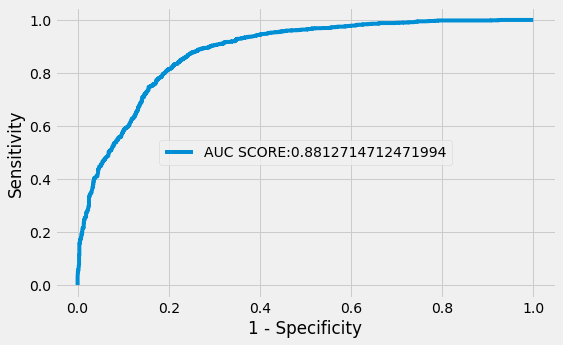

<Figure size 432x288 with 0 Axes>

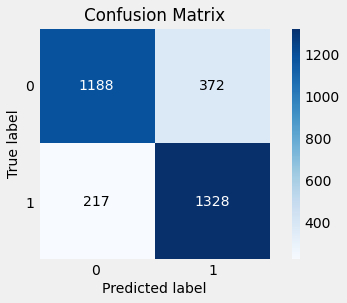

In [1894]:
model_predict(AdaBoostClassifier())

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.8479871175523349
ROC AUC Score           :  0.9183659032445439
Cross Validation Score  :  0.8246058279821806
F1 Score                : 0.8523153942428034
Precision Score                : 0.824954572986069
Recall Score                : 0.8815533980582524
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1560
           1       0.82      0.88      0.85      1545

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



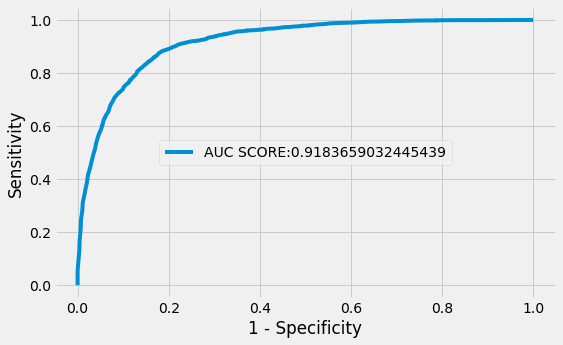

<Figure size 432x288 with 0 Axes>

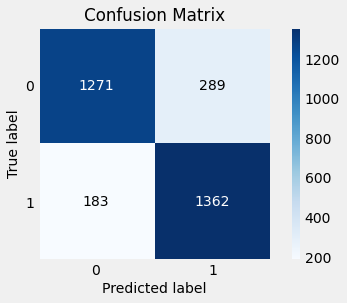

In [1895]:
model_predict(RandomForestClassifier())

[13:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

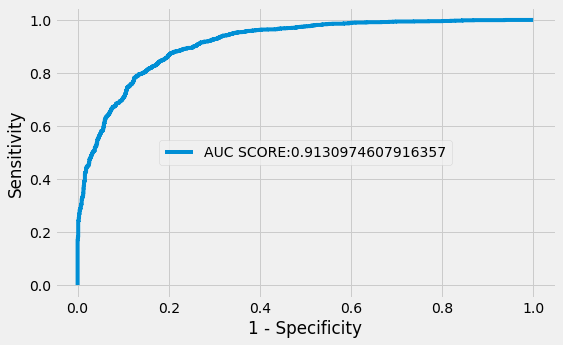

<Figure size 432x288 with 0 Axes>

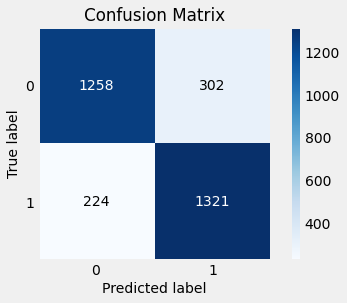

In [1896]:
model_predict(XGBClassifier())

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.8373590982286635
ROC AUC Score           :  0.9109441125217824
Cross Validation Score  :  0.815348386393274
F1 Score                : 0.8423353106462692
Precision Score                : 0.8136308805790109
Recall Score                : 0.8731391585760517
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1560
           1       0.81      0.87      0.84      1545

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



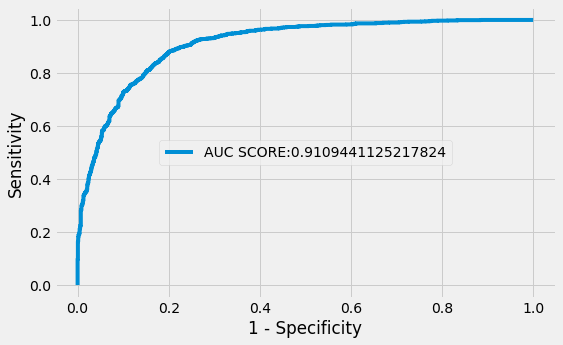

<Figure size 432x288 with 0 Axes>

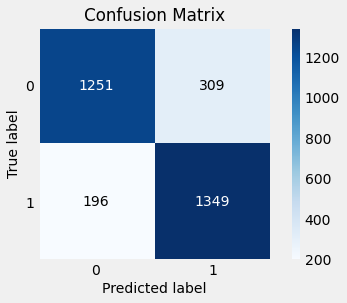

In [1897]:
model_predict(LGBMClassifier())

In [1898]:
error = []
for i in range(0,9):
    error.append(np.abs(f1_scores[i] - cv_scores[i]))
    

In [1899]:
table_dict = {
    'ROC AUC SCORE: ':auc_roc_scores,
    'ACCURACY SCORE': acc_scores,
    'CV SCORE': cv_scores,
    'F1 SCORE': f1_scores,
    'Bias/ Error': error
}

In [1900]:
table_model = pd.DataFrame(table_dict,index=['LReg','KNN','GassianNB','SVC','DTC','ADaB','RF','XGB','LightGBM'])

In [1920]:
table_model

ROC AUC SCORE:   ACCURACY SCORE  CV SCORE  F1 SCORE  Bias/ Error
LReg              0.877172        0.802899  0.786990  0.811228     0.024237
KNN               0.871292        0.797424  0.789755  0.810941     0.021186
GassianNB         0.852950        0.780998  0.773530  0.792683     0.019153
SVC               0.895261        0.826087  0.820000  0.834862     0.014862
DTC               0.762072        0.760709  0.762391  0.761016     0.001375
ADaB              0.881271        0.810306  0.800164  0.818490     0.018326
RF                0.918366        0.847987  0.824606  0.852315     0.027710
XGB               0.913097        0.830596  0.816295  0.833965     0.017669
LightGBM          0.910944        0.837359  0.815348  0.842335     0.026987

##### OBSERVATIONS:

       -AS ALL THE MODELS HAVE SMALL ERROR TERMS . with least error of DTC giving error of  0.01%
       - Among Ensembling Techniques Bagging Algorithm XGB GIVES LEAST ERROR in validation score and Accuracy score. , best among all the ensembling techniques.
       
       
       - AS the errors are all small and donot vary much , we can proceed with RF for Hyper Parameter Tuning, As it is less prone to Overfit w.r.t to KNN.
       
       
 ### HYPER ENSEMBLING TECHNIQUES RF, LightGB , KNN
 
 
 #### RANDOM FOREST HYPER PARAMETER TUNING

In [1902]:
params = {
    'criterion' : ['entropy','gini'],
    'n_estimators': [50,100,120,70,150],
    'max_depth': [None,15,5,10,8],
     'min_samples_leaf':[1,2,5,10],
    'min_samples_split':[1,2,3,4,5],
    'min_weight_fraction_leaf': [0.0,.5,.2,.1,.6,.8],
    'max_leaf_nodes':[None,10,20,50,70,80,100],
    
    
}
grid= RandomizedSearchCV(RandomForestClassifier(),params,n_iter=100,scoring='f1',cv=5,verbose=2)



In [1903]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=3, min_weight_fraction_leaf=0.6, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=3, min_weight_fraction_leaf=0.6, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=3, min_weight_fraction_leaf=0.6, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=3, min_weight_fraction_leaf=0.6, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=3, min_weight_fraction_leaf=0.6, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5, m

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 15, 5, 10, 8],
                                        'max_leaf_nodes': [None, 10, 20, 50, 70,
                                                           80, 100],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.0, 0.5,
                                                                     0.2, 0.1,
                                                                     0.6, 0.8],
                                        'n_estimators': [50, 100, 120, 70,
                                                         150]},
                   scoring='f1', verbose=2)

In [1904]:
grid.best_score_,grid.best_estimator_

(0.8080913586539266,
 RandomForestClassifier(max_depth=10, max_leaf_nodes=100, min_samples_leaf=5,
                        min_samples_split=5, n_estimators=150))

------------ RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                       n_estimators=120) --------------
 Accuracy Score         :  0.8341384863123994
ROC AUC Score           :  0.9037590241473737
Cross Validation Score  :  0.8128960677766793
F1 Score                : 0.8407052273430251
Precision Score                : 0.8050947867298578
Recall Score                : 0.8796116504854369
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1560
           1       0.81      0.88      0.84      1545

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



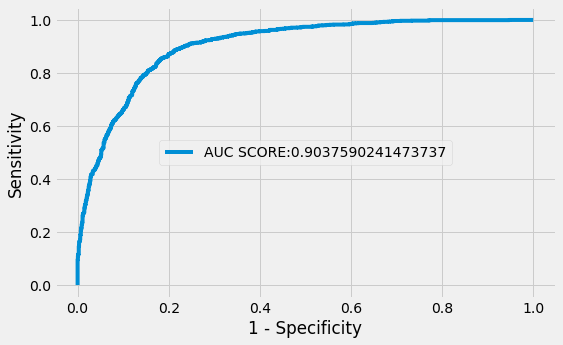

<Figure size 432x288 with 0 Axes>

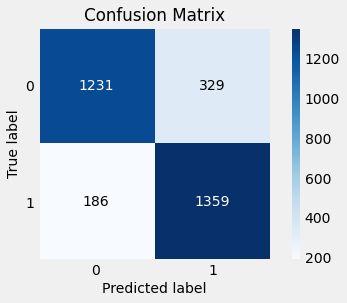

In [1905]:
model_predict(RandomForestClassifier(min_samples_leaf=5, min_samples_split=5,
                        n_estimators=120))

#### LIGHT GBM PARAMETER TUNING

In [1906]:
params = {
     'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
   
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
    
    
}
grid= RandomizedSearchCV(LGBMClassifier(),params,n_iter=100,scoring='f1',cv=5,verbose=2)



In [1907]:
grid.fit(x_over,y_over)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END bagging_fraction=0.8, bagging_freq=15, learning_rate=0.02, max_depth=12, num_leaves=20; total time=   0.0s
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END bagging_fraction=0.8, bagging_freq=15, learning_rate=0.02, max_depth=12, num_leaves=20; total time=   0.0s
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END bagging_fractio

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='f1', verbose=2)

In [1908]:
grid.best_score_,grid.best_estimator_

(0.8224367286608552,
 LGBMClassifier(bagging_fraction=0.8, bagging_freq=12, max_depth=10,
                num_leaves=80))

[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current va

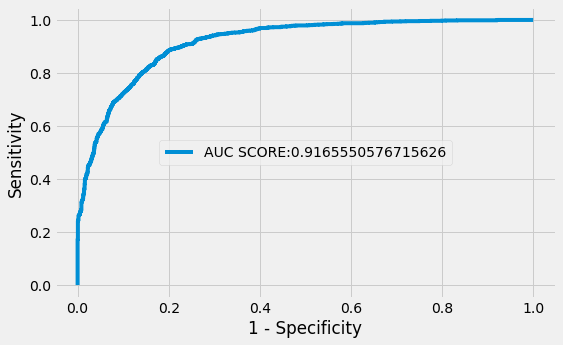

<Figure size 432x288 with 0 Axes>

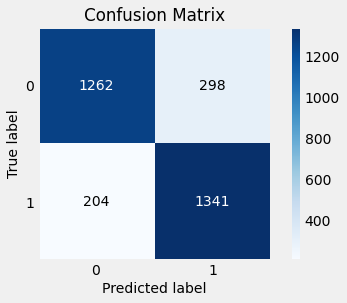

In [1909]:
model_predict(
 LGBMClassifier(bagging_fraction=0.85, bagging_freq=7, max_depth=12,
                num_leaves=50))

#### KNN HYPER PARAMETER TUNING

In [1910]:
params = {
    'weights' : ['uniform','distance'],
    'n_neighbors': [5,10,15,20,12,17,11,7],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
     'leaf_size':[20,30,40,50,100],
    'p':[1,2]
    
}
grid= RandomizedSearchCV(KNeighborsClassifier(),params,n_iter=100,scoring='f1',cv=5,verbose=2)



In [1911]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END algorithm=brute, leaf_size=40, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=40, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=40, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=40, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=40, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=50, n_neighbors=17, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=50, n_neighbors=17, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=50, n_neighbors=17, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=50, n_neighbors=17, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=50, n_neighbors=17, p=1, weig

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40, 50, 100],
                                        'n_neighbors': [5, 10, 15, 20, 12, 17,
                                                        11, 7],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='f1', verbose=2)

In [1912]:
grid.best_estimator_,grid.best_score_

(KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, n_neighbors=20, p=1,
                      weights='distance'),
 0.8133678661338939)

------------ KNeighborsClassifier(leaf_size=40, n_neighbors=7, p=1, weights='distance') --------------
 Accuracy Score         :  0.81256038647343
ROC AUC Score           :  0.8961828893867728
Cross Validation Score  :  0.8092559428910295
F1 Score                : 0.8275044457617072
Precision Score                : 0.7632586112629852
Recall Score                : 0.9035598705501618
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1560
           1       0.76      0.90      0.83      1545

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



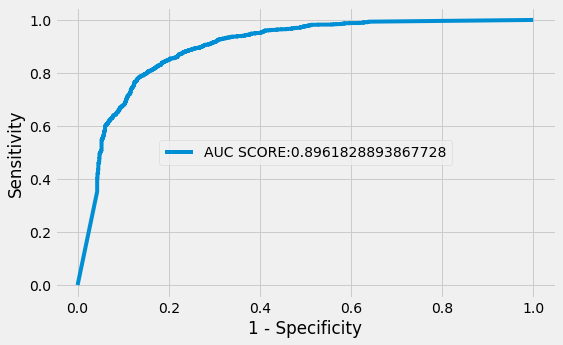

<Figure size 432x288 with 0 Axes>

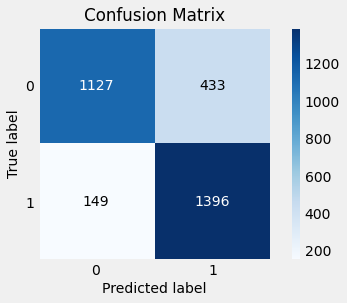

In [1913]:
model_predict(KNeighborsClassifier(leaf_size=40, n_neighbors=7, p=1, weights='distance'))

### XGB HYPERPARAMETER TUNING 

In [1932]:
params = {
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15,7],
    'learning_rate': [0.1,.5,.2,0.01],
    'gamma': [.1,.5,1,2],
    'subsample': [1,.8,.75,.6],
    'min_child_weight': [1,3,5,2]
    
    
}

boost = XGBClassifier()
grid = RandomizedSearchCV(boost,params,cv=5,n_iter=50,scoring='f1',verbose=2)

In [1933]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.9s
[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.8s
[13:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_r

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [1934]:
grid.best_estimator_,grid.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.2, max_delta_step=0, max_depth=15,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.8190621744872827)

[14:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

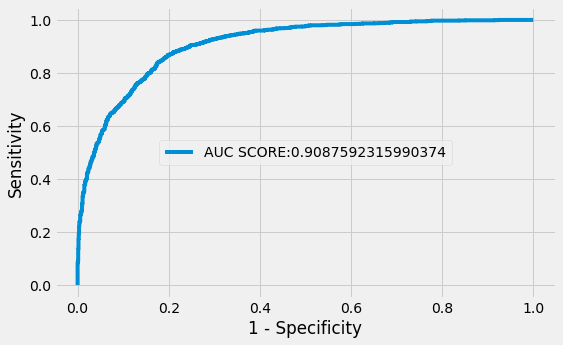

<Figure size 432x288 with 0 Axes>

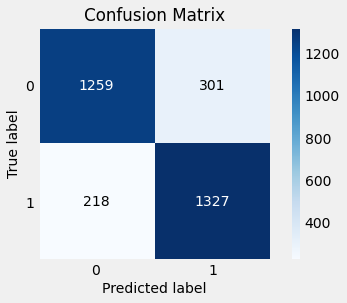

In [1936]:
model_predict(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.2, max_delta_step=0, max_depth=15,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

#### AFTER HYPER PARAMTER TUNINIG, Light GB performs the BESt AS:
    - It gives least nyumber of FN, FP in confusion MEtrics and highest F1 Score. 
    - No Biassed Prediction Seen in the model toward minoirity or majority Classes.
    
 ### MODEL FOR EVALUATION : LightGB

In [1914]:
    model =  LGBMClassifier(bagging_fraction=0.85, bagging_freq=7, max_depth=12,
                num_leaves=50)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,x_over,y_over,cv=5,scoring='f1'))
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
   
    
   

[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current va

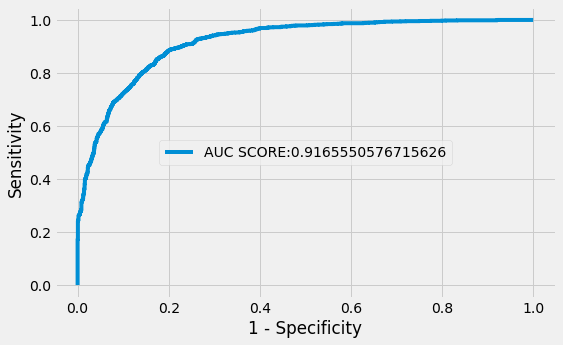

In [1915]:
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr)
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
plt.legend( [leg],loc= 10)
    
   

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

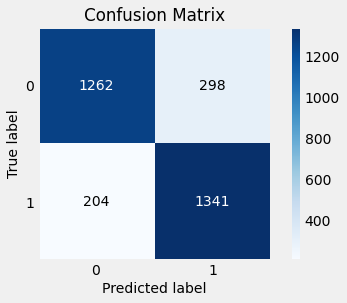

In [1916]:
 
plt.figure()
skplt.metrics.plot_confusion_matrix(y_test,predictions)
    

In [1917]:
import joblib 

In [1918]:
joblib.dump(model,'churn_LGBM.pk1')

['churn_LGBM.pk1']

In [1919]:
joblib.load('churn_LGBM.pk1')

LGBMClassifier(bagging_fraction=0.85, bagging_freq=7, max_depth=12,
               num_leaves=50)

#### CONCLUSION :
    - FINAL MODEL PREDCITON WERE DONE WITH LIGHT GBM ENSEMBLING TECHNIQUE.
    - no biassness in predction for majority or minority target clas.
  #### CONCLUSION FROM EDA
     - Contract Type , Tenure influences most toward the churn Rate.
     